<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

# Table of Contents 
## 1. Introduction
   - [1.1 Problem Understanding](#part1.1)
   - [1.2 Data Exploration and Analysis](#part1.2)
   - [1.3 Loading Data](#part1.3)
    
## 2. Data Preprocessing 
   - [2.1 Numerical Variables](#part2.1) 
   - [2.2 Categorical Variables](#part2.2)
       - [2.2.1 Cardinality](#part2.2.1)
       
## 3. Train Test Split
   - [3.1 Data Cleansing](#part3.1) 
       - [3.1.1 Handling Outliers](#part3.1.1)
       - [3.1.2 Handling Missing Values](#part3.1.2) 
       
## 4. Data Transformation
   - [4.1 Categorical Variables](#part4.1)
       - [4.1.1 Regrouping rare categories](#part4.1.1) 
       - [4.1.2 Categorical Encoding](#part4.1.2) 
   - [4.2 Numerical Variables](#part4.2) 

## 5. Feature Engineering 
   - [5.1 Feature Scaling](#part5.1) 
   - [5.2 Feature Creation](#part5.2) 
   
## 6. Linear Regression Modelling 
   - [6.1 Building and Evaluating the Model](#part6.1)

## 7. Reflection 
   - [7.1 Summary](#part7.1)
   - [7.2 Improvements](#part7.2)
   - [7.3 Presentation](#part7.3) 

## 1. Introduction <a id="part1"></a>

The dataset for this assignment is data collected from supermarket outlets and stores in different cities (supermarket.csv). The aim of this assignment is help the supermarket management team to predict the sales of each product at a particular outlet. This will be done through data exploration, preparation and transformation. At the end of the data modelling, a simple linear regression model will be built and used for further evaluation. Throughout the entire process, analysis on the data will documented. Using the linear regression model built at the end, the supermarket management team will be able to understand the properties of products and outlets which play a crucial role in boosting the sales.

### 1.1 Problem Understanding <a id="part1.1"></a>
The supermarket management team will be able to forecast sales better and also come up with methods to help to increase the supermarket's revenue and sales through understanding the relationships between the target variable (Item_Outlet_Sales) and other variables such as item weight and item visibility. 

### 1.2 Data Exploration and Analysis <a id="part1.2"></a>

I will be exploring the data using TIBCO Spotfire, to get a general overview of the dataset.

### Table of the Dataset
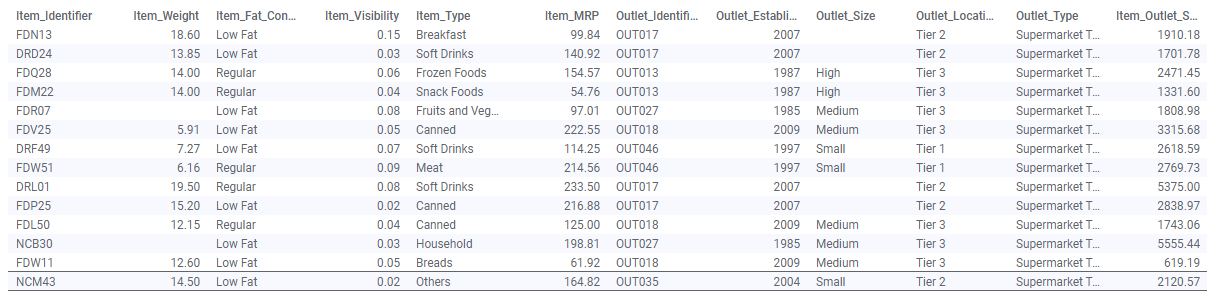
- it can be seen here that Item_Weight contains nulls which will need to be dealt with later. 

### Target Variable
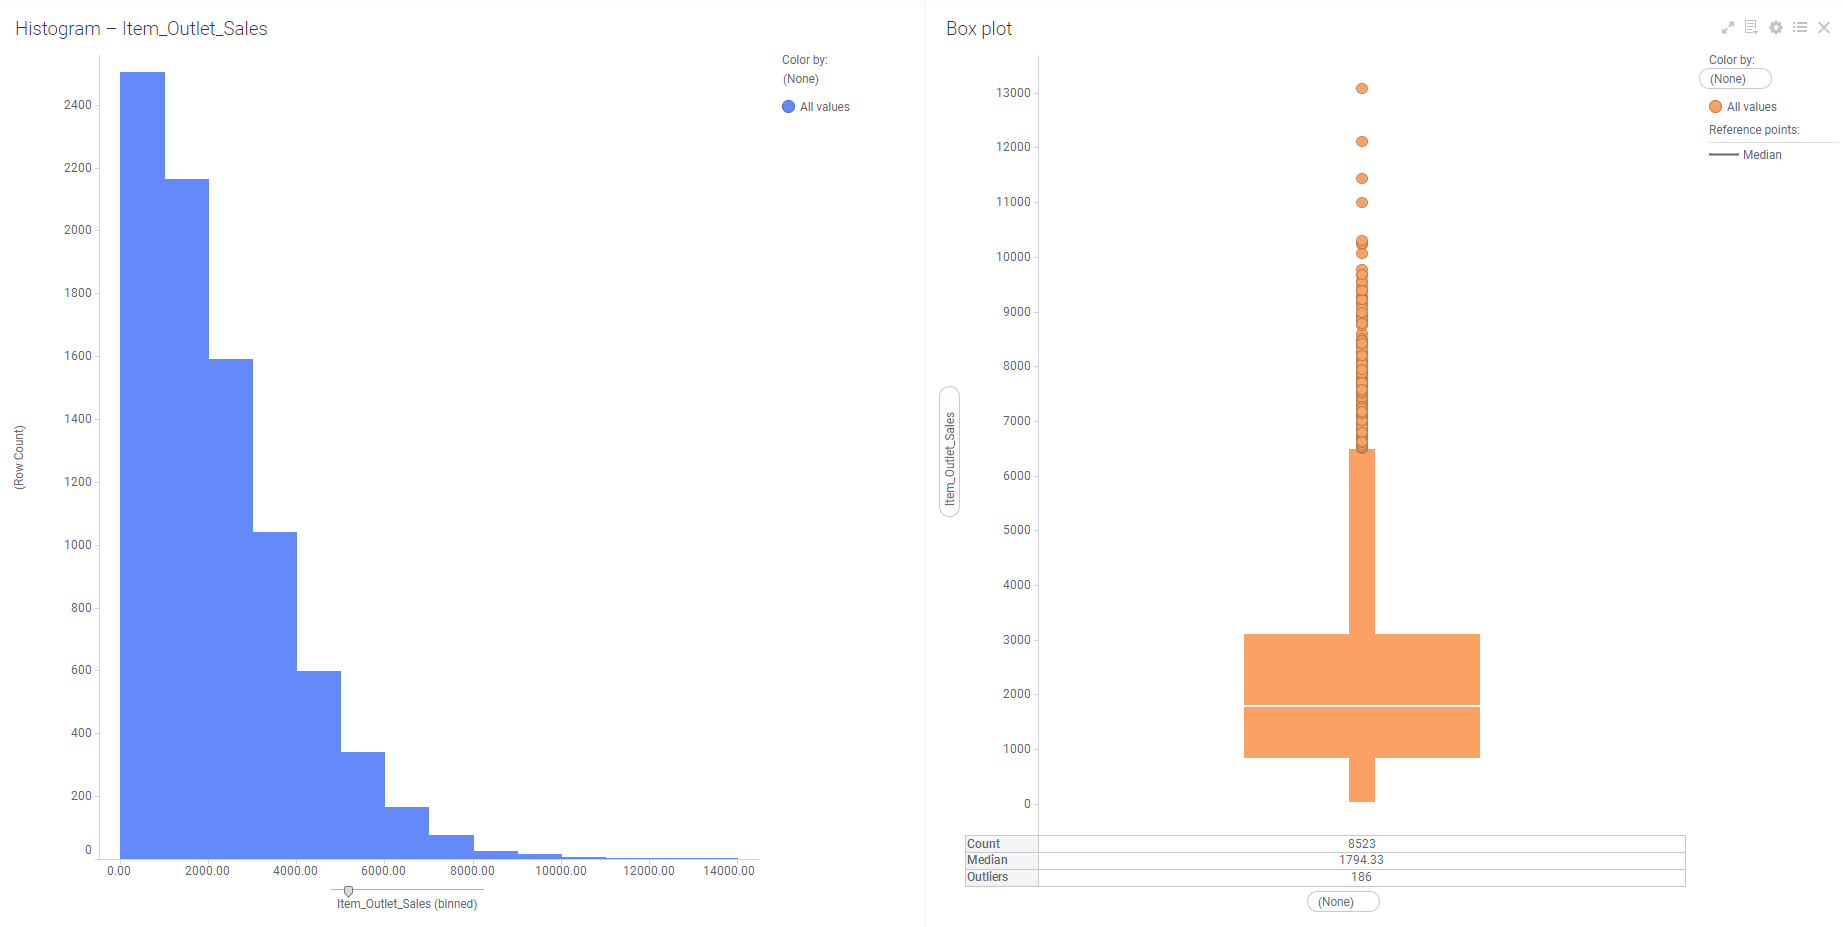
- The distribution of the target variable (Item_Outlet_Sales) is right skewed, indicating that the majority of observations are towards the lower end of the range, while a few extreme values are shown towards the right. This suggests that the data is positively skewed, with a longer tail on the right side. Additionally, there are outliers in the variable,which can impact the a interpretation of the data later on, as they may distort statistical measures. 

### Target vs. Categories
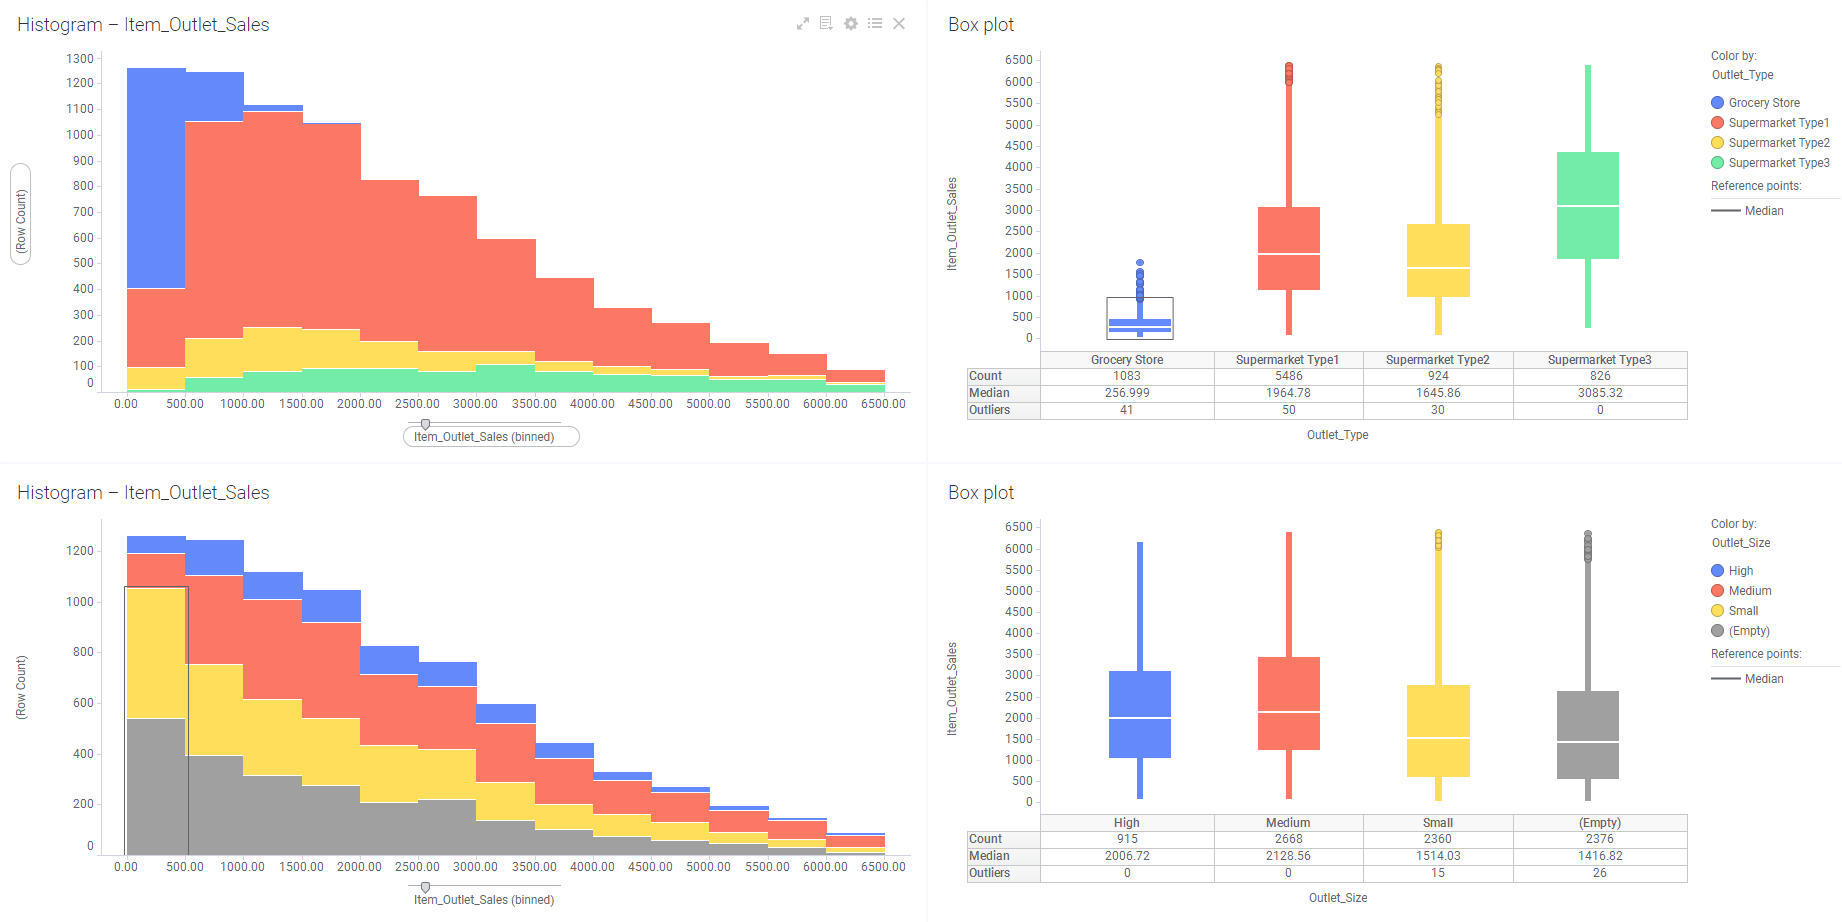
- most sales come from supermarket type1
- Outlet_Size contains nulls

### Target vs. Numerical Variables
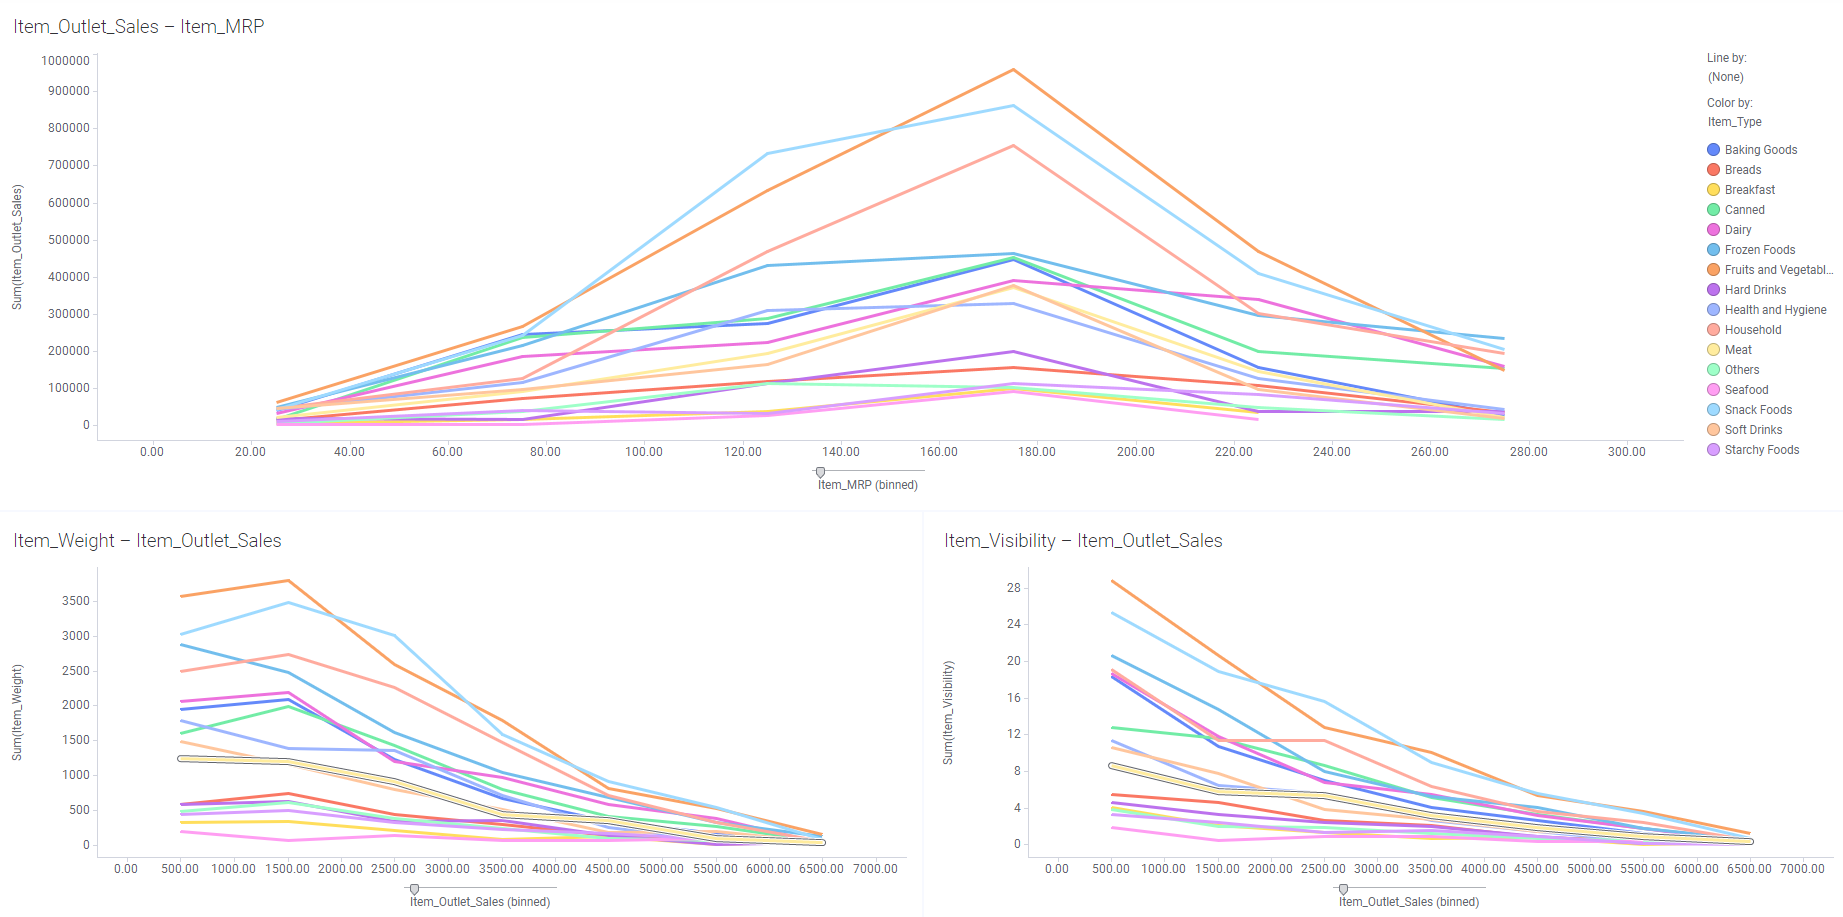
-  only Item_MRP exhibits a positive relationship with the target variable. As the maximum retail price (MRP) of an item increases, it results in potentially higher sales or revenue. However, as it increases more, it starts to decrease as well.
- out of all the item types, Fruits and Vegetables generates the most sales.  

### Conclusion 
The dataset contains nulls that need to be cleaned during the data preprocessing. I also found that the relationships between the continuous numerical values were not positive, only Item_MRP showed a positive relationship.

### 1.3 Load Data into Jupyter Notebook <a id="part1.3"></a>

In [1]:
# importing the packages 

# for dataframes 
import numpy as np 
import pandas as pd

# for visualisations 
import matplotlib.pyplot as plt
import seaborn as sns

# for splitting the datasets
from sklearn.model_selection import train_test_split

# for the Q-Q plots
import scipy.stats as stats

# for outlier handling
from feature_engine.outliers import Winsorizer

# for imputation
from sklearn.pipeline import Pipeline
import feature_engine.imputation as mdi

# for encoding 
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# numerical transformation
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler

# polynomial transformation 
from sklearn.preprocessing import PolynomialFeatures

# PCA 
from sklearn.decomposition import PCA

# discretization techniques
from feature_engine.discretisation import EqualWidthDiscretiser

In [2]:
data = pd.read_csv('./supermarket.csv')

In [3]:
# copy of the dataset 
data_copy = data.copy() 

In [4]:
data.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_10464\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


This is a correlation table of between numerical variables. It can be seen here that most of them do not have positive relationships with the target, which was also found in TIBCO Spotfire.

### 2. Data Preprocessing <a id="part2"></a>

Before cleaning the data or performing any transformations, it is important to understand what is in my dataset. I will be doing so by exploring the data in aspects such as missing data, variable distribution, cardinality of variables and rare categories and feature magnitude. This is done in order to spot errors, inconsistencies and the organization of data for analysis. 

Data preprocessing is the preparation of data for initial transformations, aggregations and data cleansing. It helps me to know what data needs to be cleaned in the dataset.

##### Getting a general overview of the dataset 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##### Checking for nulls in the dataset 

In [8]:
data.isnull().mean()

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

It is noted here that Item_Weight and Outlet_Size contain nulls.

For a more detailed and organised view of the data, I will be separating them by numerical and categorical variables respectively.

### 2.1 Numerical Variables <a id="part2.1"></a>

In my numerical variables, I will want to spot out for outliers and the distributions in the variables. By anaylsing them individually based on these aspects, it will help me influence my decisions on how to deal with the respective outliers, distributions, and whether I want to transform them later on. 

In [9]:
# identifying numerical variables
num_cols = [n for n in data.columns if data[n].dtypes!='O']

print('Numerical Variables :\n')
for i in range(len(num_cols)) :
    print(num_cols[i])we a

Numerical Variables :

Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Item_Outlet_Sales


In [10]:
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(20,7))
    plt.subplot(1, 3, 1)
    plt.title('Histogram')
    sns.distplot(df[variable],bins = 30)
    
    plt.subplot(1, 3, 2)
    plt.title('Boxplot')
    sns.boxplot(y=df[variable])
    
    plt.subplot(1, 3, 3)
    stats.probplot(df[variable], dist="norm", plot=plt)


    plt.show()

#### Item_Outlet_Sales 
- sales dollar amount of the product in the particular store
- target variable 

C:\Users\user\AppData\Local\Temp\ipykernel_10464\2447837687.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins = 30)


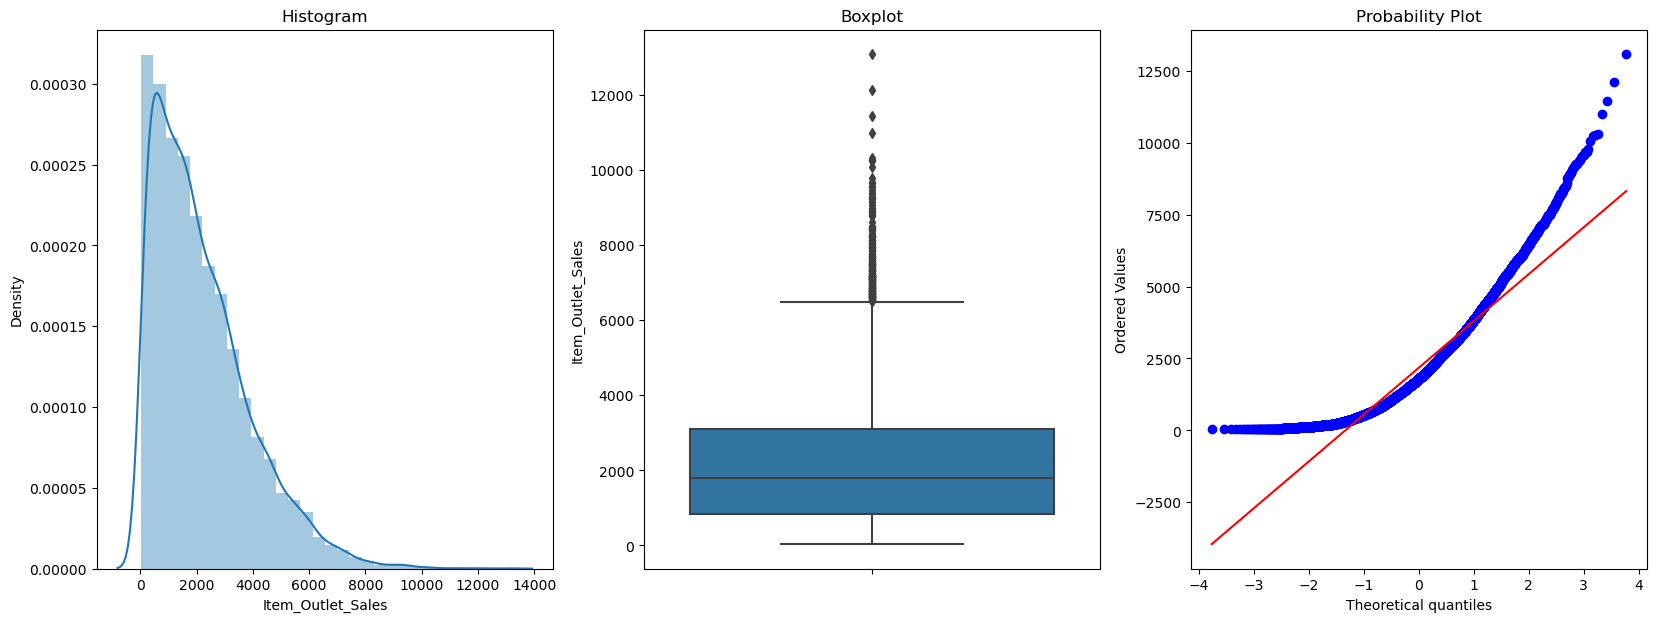

In [11]:
diagnostic_plots(data,'Item_Outlet_Sales')

- Histogram distribution : right skewed 
- Outliers : Yes, many present
- Probability Plot : does not fit the line completely

It is to be noted that the TARGET variable should not be transformed, unless reversible. 

#### Item_Weight
- weight of the product 

C:\Users\user\AppData\Local\Temp\ipykernel_10464\2447837687.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins = 30)


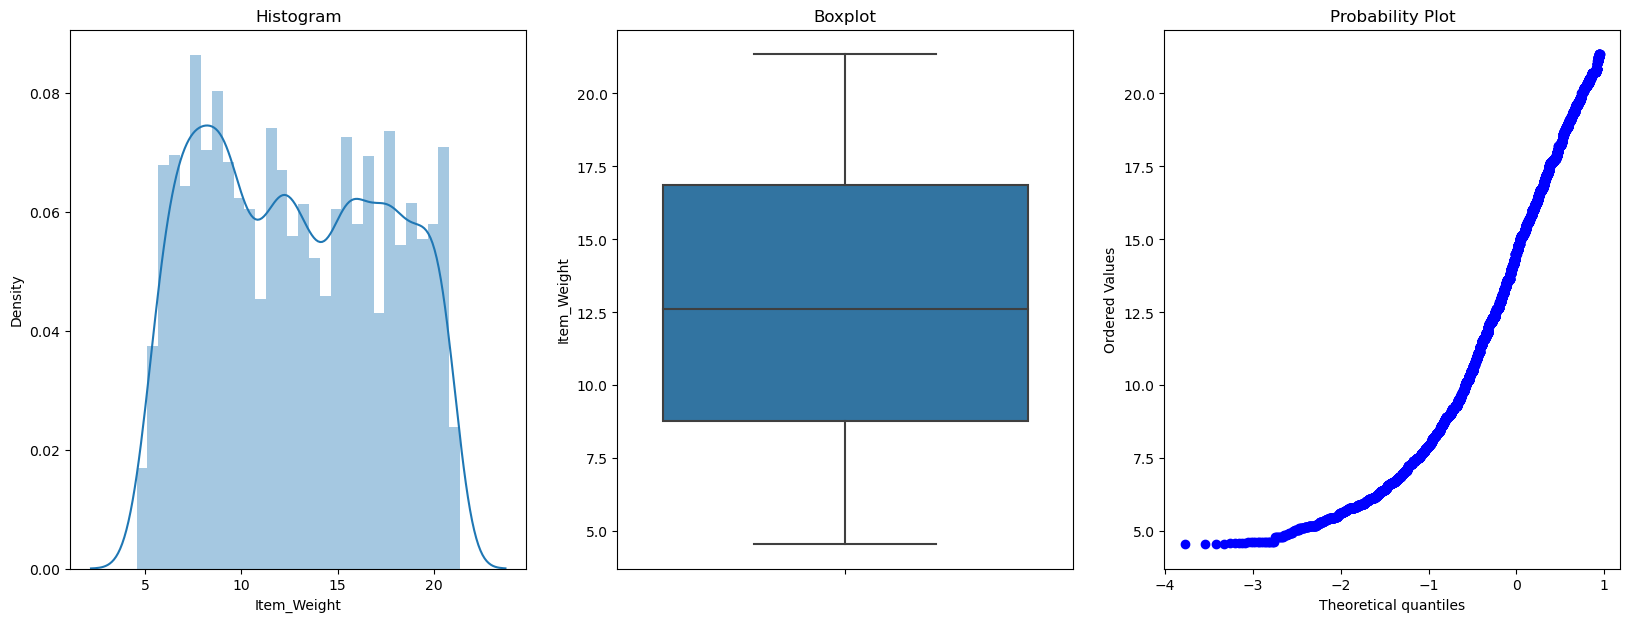

In [12]:
diagnostic_plots(data,'Item_Weight')

- Histogram distribution : irregular with multiple peaks
- Outliers : None present
- Probability Plot : no line present 

#### Item_Visibility 
- the % of the total display area of all products in a store allocated to the particular product 

C:\Users\user\AppData\Local\Temp\ipykernel_10464\2447837687.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins = 30)


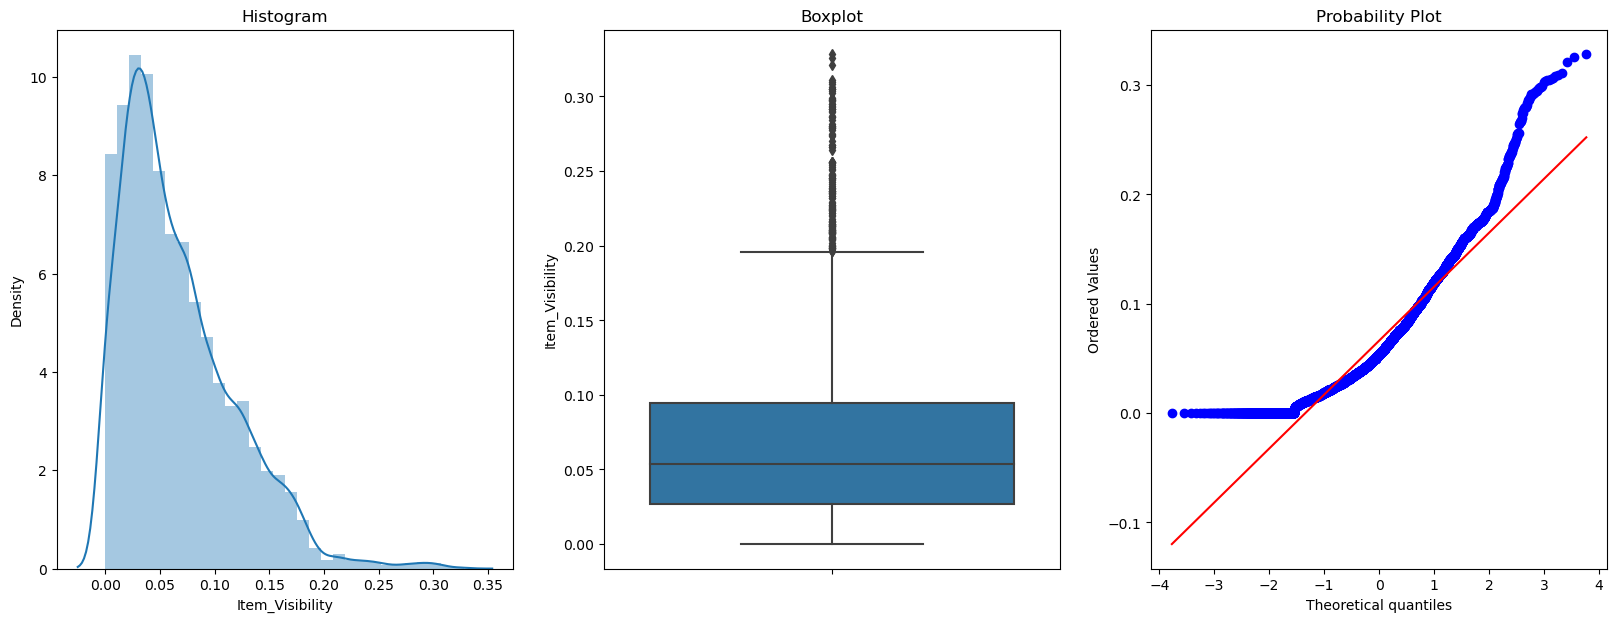

In [13]:
diagnostic_plots(data,'Item_Visibility')

- Histogram distribution : Right skewed 
- Outliers : Yes, many present
- Probability Plot : Almost fits the line, but can be improved with transformation 

#### Item_MRP
- maximum retail price of the product 

C:\Users\user\AppData\Local\Temp\ipykernel_10464\2447837687.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins = 30)


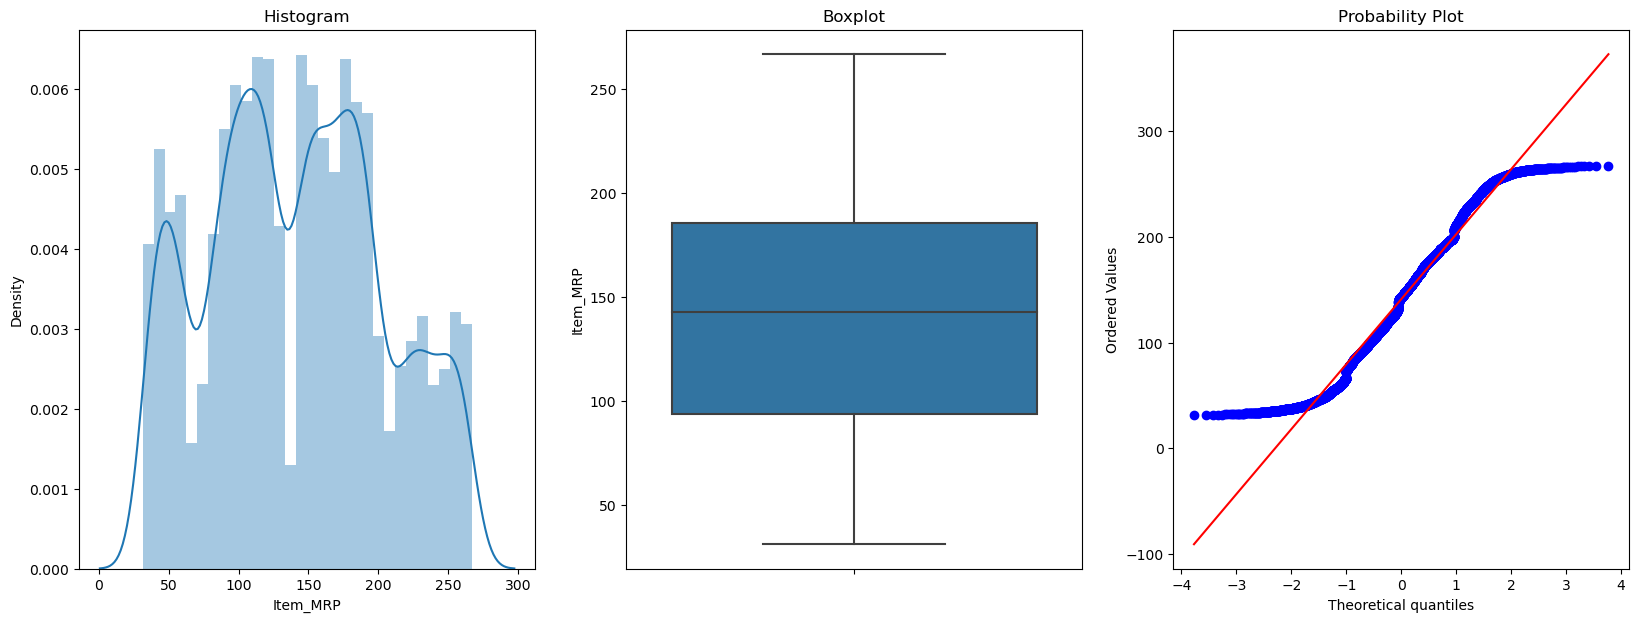

In [14]:
diagnostic_plots(data,'Item_MRP')

- Histogram distribution : Irregularly distributed
- Outliers : None present
- Probability Plot : Almost fits the line, but can be improved with transformation 

#### Outlet Establishment Year
- the year in which the store was established 

C:\Users\user\AppData\Local\Temp\ipykernel_10464\2447837687.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins = 30)


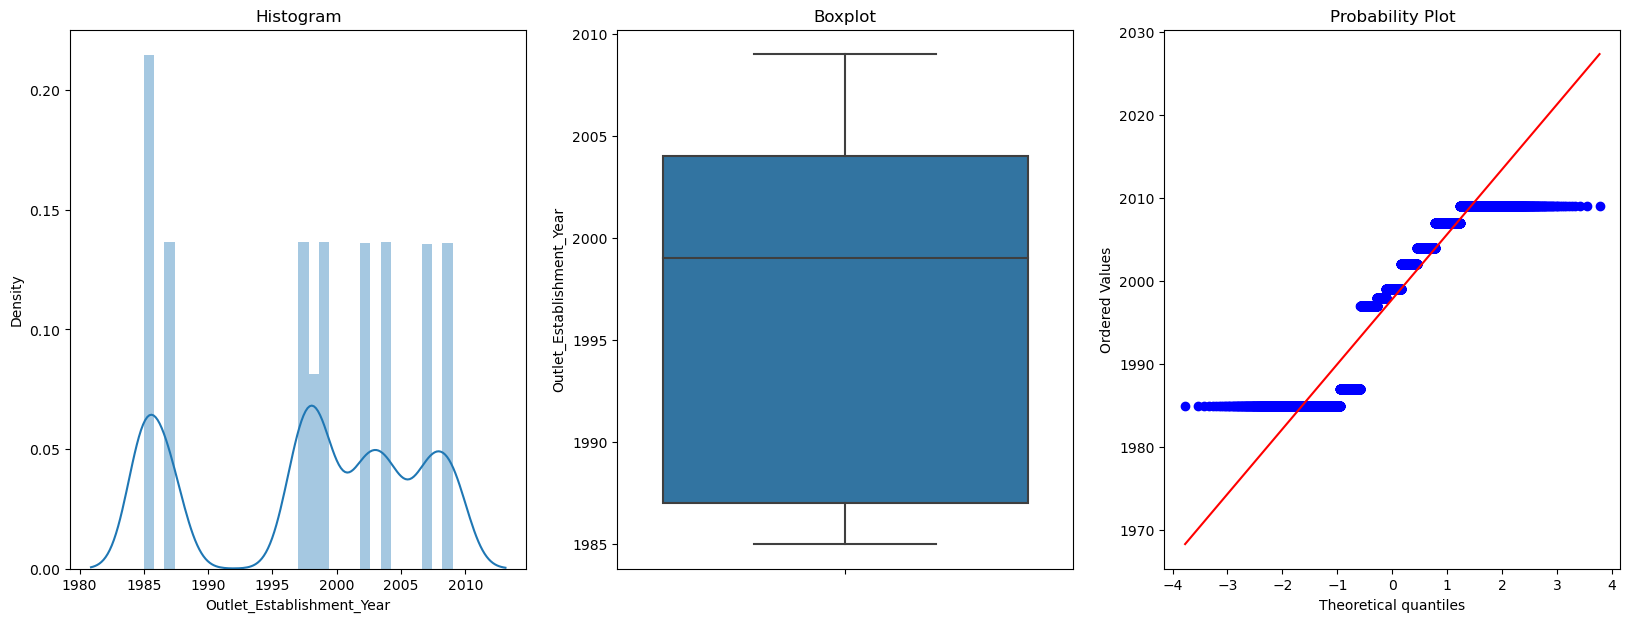

In [15]:
diagnostic_plots(data,'Outlet_Establishment_Year')

- Histogram distribution : Discretely distributed - it is not continuous 
- Outliers : None present
- Probability Plot : does not fit the line, as it is discrete

### Conclusion for Numerical Variables 
- distributions can be handled using mathematical transformations later on
- probability plot lines are satisfactory for most variables 
#### Outlier handling 
- Item_Visibility and Item_Outlet_Sales (target variable) contained outliers, which I believe should be handled later on (after splitting the dataset) 

It is important to note that distributions may be different after the splitting of the dataset. However, this provides a general overview on how to handle the numerical variables.

### 2.2 Categorical Variables <a id="part2.2"></a>
In the categorical variables, it is important to inspect for the cardinality of the variables, as it influences the encoding of the variables later on. I will also want to spot out for rare categories in the variables, for regrouping if needed.

In [16]:
# identifying categorical values 
cat_cols = [c for c in data.columns if data[c].dtypes=='O'] 

print('Categorical Variables : \n')
for i in range(len(cat_cols)) :
    print(cat_cols[i])

Categorical Variables : 

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


### 2.2.1 Cardinality <a id="part2.2.1"></a>

Text(0.5, 1.0, 'Cardinality')

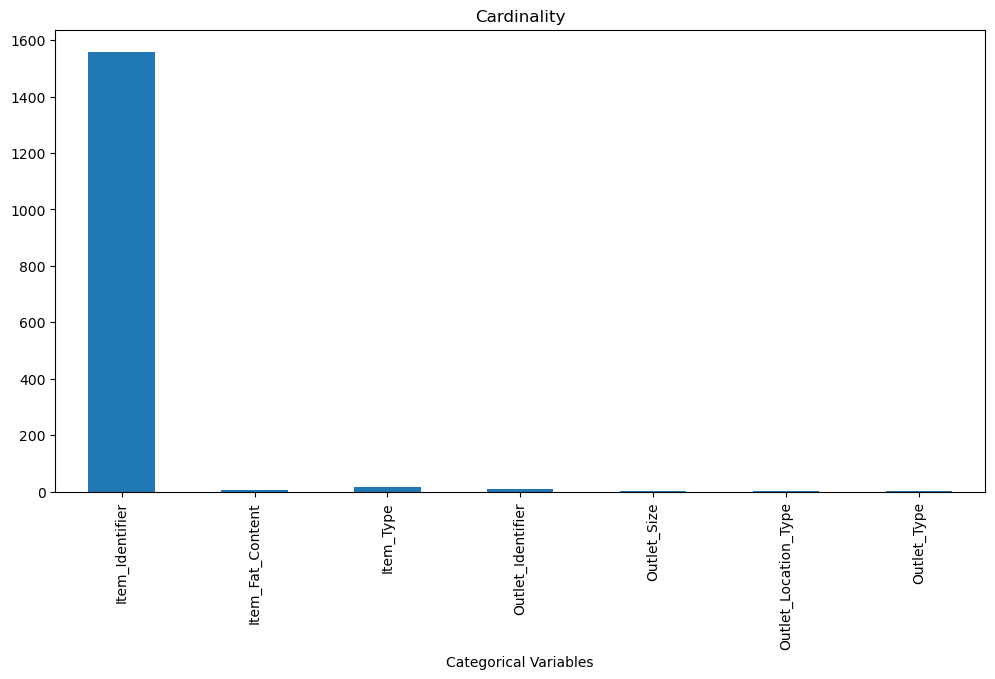

In [17]:
data[cat_cols].nunique().plot.bar(figsize=(12,6))

plt.xlabel('Categorical Variables')
plt.title('Cardinality')

It is identified here that Item_Identifier contains a cardinality of more than 1400. As having a high cardinality may affect encoding and potentially affect the performance of the model, I will be dropping this column for the entire assignment.

In [18]:
data['Item_Identifier'].nunique()

1559

In [19]:
data = data.drop(['Item_Identifier'],axis = 1)

After dropping Item_Identifier, let's inspect the cardinality of the variables again. 

In [20]:
# new cat_cols
cat_cols = [c for c in data.columns if data[c].dtypes=='O'] 

print('Categorical Variables : \n')
for i in range(len(cat_cols)) :
    print(cat_cols[i])

Categorical Variables : 

Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


Text(0.5, 1.0, 'Cardinality')

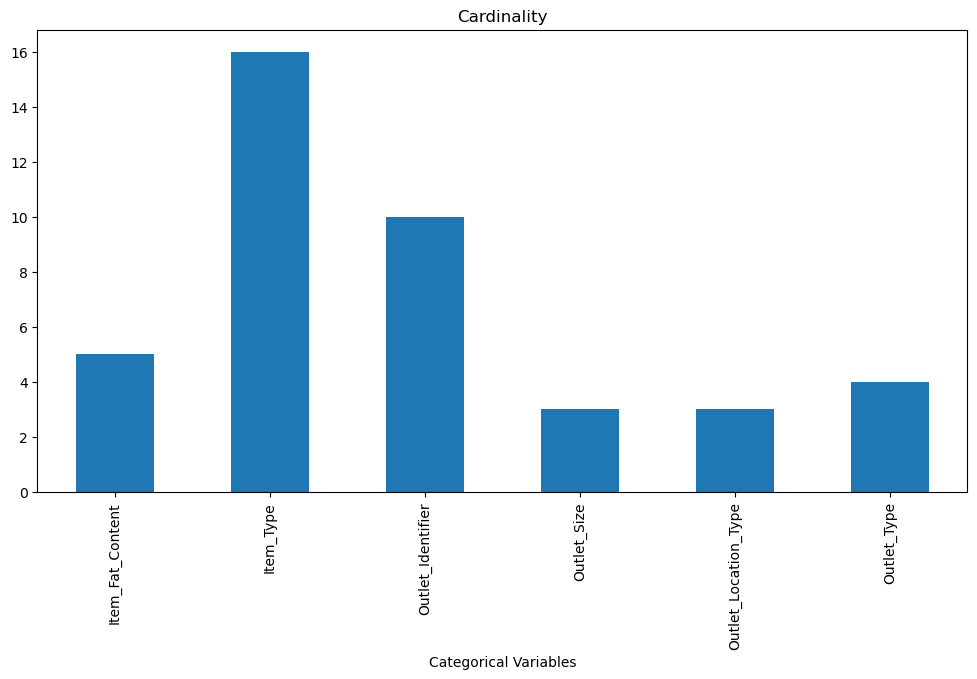

In [21]:
data[cat_cols].nunique().plot.bar(figsize=(12,6))

plt.xlabel('Categorical Variables')
plt.title('Cardinality')

##### Comments on Cardinality 
- Item_Type and Outlet_Identifier have higher cardinalities, due to what they represent (unique identifiers for individual items/objects) 

As this only gives me a general overview of the cardinality of the categorical variables, I will be exploring them individually.

### Checking for rare categories 

#### Item_Type 
- category in which the item belongs 

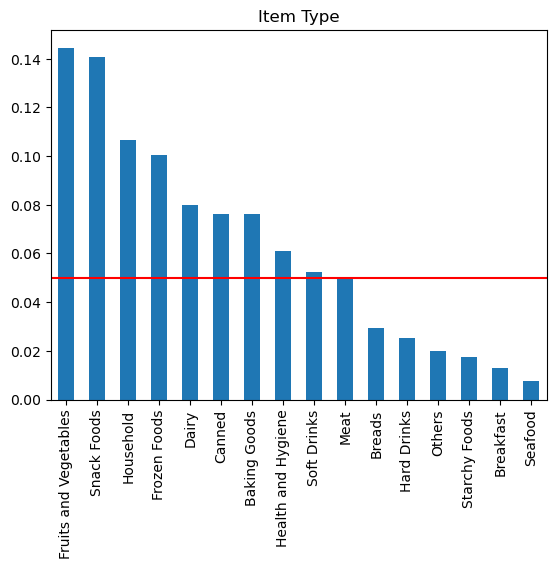

In [22]:
label_item = data['Item_Type'].value_counts() / len(data)

fig = label_item.sort_values(ascending=False).plot.bar()

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

plt.title('Item Type')

plt.show()

- it contains rare categories, which can be regrouped. 

#### Outlet_Size
- the size of the store in terms of ground area covered

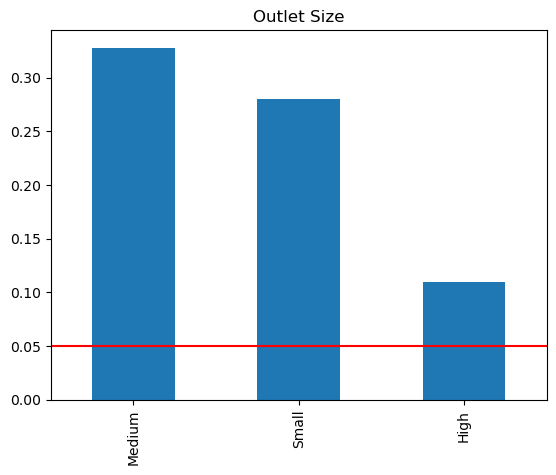

In [23]:
label_size = data['Outlet_Size'].value_counts() / len(data)

fig = label_size.sort_values(ascending=False).plot.bar()

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

plt.title('Outlet Size')
plt.show()

- does not require regrouping as it does not contain rare categories 

#### Outlet_Location_Type 
- the type of city in which the store is located

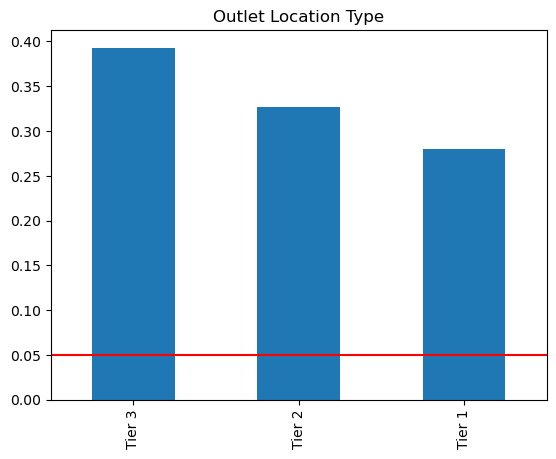

In [24]:
label_location = data['Outlet_Location_Type'].value_counts() / len(data)

fig = label_location.sort_values(ascending=False).plot.bar()

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

plt.title('Outlet Location Type')
plt.show()

- does not require regrouping as it does not contain rare categories 

#### Outlet_Type 
- whether the outlet is a grocery store or some sort of supermarket

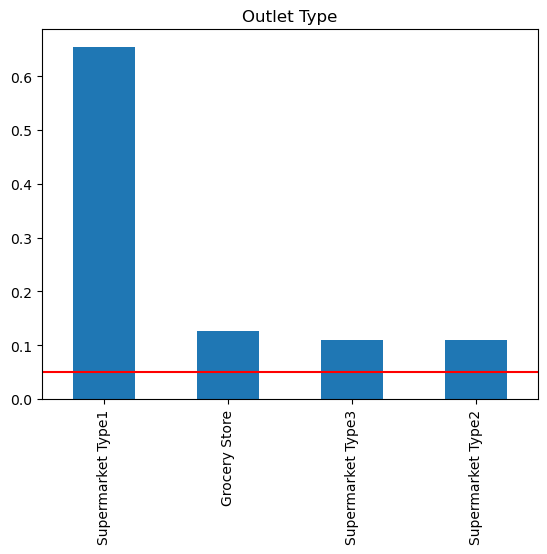

In [25]:
label_outlet = data['Outlet_Type'].value_counts() / len(data)

fig = label_outlet.sort_values(ascending=False).plot.bar()

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

plt.title('Outlet Type')
plt.show()

#### Item_Fat_Content
- whether the product is low fat or not

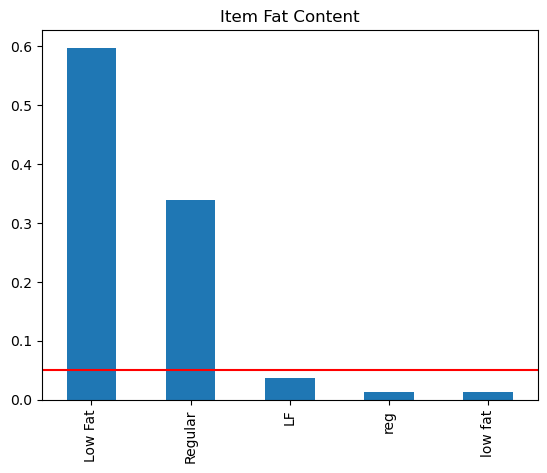

In [26]:
label_fat = data['Item_Fat_Content'].value_counts() / len(data)

fig = label_fat.sort_values(ascending=False).plot.bar()

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

plt.title('Item Fat Content')
plt.show()

- the categories can be regrouped. 
'LF','low fat' and Low Fat mean the same thing, as is for 'Regular' and 'reg'

### Conclusion - Categorical Variables 
After inspecting the cardinality of the variables, I was able to see which columns would be meaningful for my model. 
#### Regrouping of rare categories
Item_Fat_Content and Item_Type contained rare categories, which I have decided that I am going to regroup them. 
It is important to note that there will be slight changes when I split the dataset however this does not influence my decision in regrouping them.

### 3. Train and Test Split <a id="part3"></a>
Train test split is a model validation procedure for simulating how a model would perform on new/unseen data. When we want to build a model that can make predictions, we need to teach it using data.

The training set is used to teach the model on how to make the predictions. Once the model has understood, it is tested using the test set, which has unseen data for the model, which will show us how well it can perform predictions. 

As common practice, 70% of the dataset is allocated to the training set, leaving 30% for the test set.



In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Item_Outlet_Sales', axis=1), data['Item_Outlet_Sales'], test_size=0.3, random_state=0)

X_train.shape,X_test.shape

((5966, 10), (2557, 10))

In [28]:
pd.concat([X_train, pd.DataFrame(y_train, columns = ['Item_Outlet_Sales'])],axis=1).corr()

C:\Users\user\AppData\Local\Temp\ipykernel_10464\1498253474.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.concat([X_train, pd.DataFrame(y_train, columns = ['Item_Outlet_Sales'])],axis=1).corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.002239,0.021929,-0.020647,0.008002
Item_Visibility,-0.002239,1.000000,-0.002903,-0.079889,-0.126833
Item_MRP,0.021929,-0.002903,1.000000,-0.003796,0.571122
Outlet_Establishment_Year,-0.020647,-0.079889,-0.003796,1.000000,-0.045682
Item_Outlet_Sales,0.008002,-0.126833,0.571122,-0.045682,1.000000


### 3.1 Data Cleansing <a id="part3.1"></a> 
Now that the dataset has been split, I can perform the necessary cleaning and handling of outliers. 

### 3.1.1 Outlier Handling <a id="part3.1.1"></a>
It was previously identified in the main dataset that Item_Visibility and Item_Outlet_Sales (the target variable) contained outliers. First, let's inspect what it looks like in X_train and y_train (for Item_Outlet_Sales, it cannot be found in X_train).

C:\Users\user\AppData\Local\Temp\ipykernel_10464\2447837687.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins = 30)


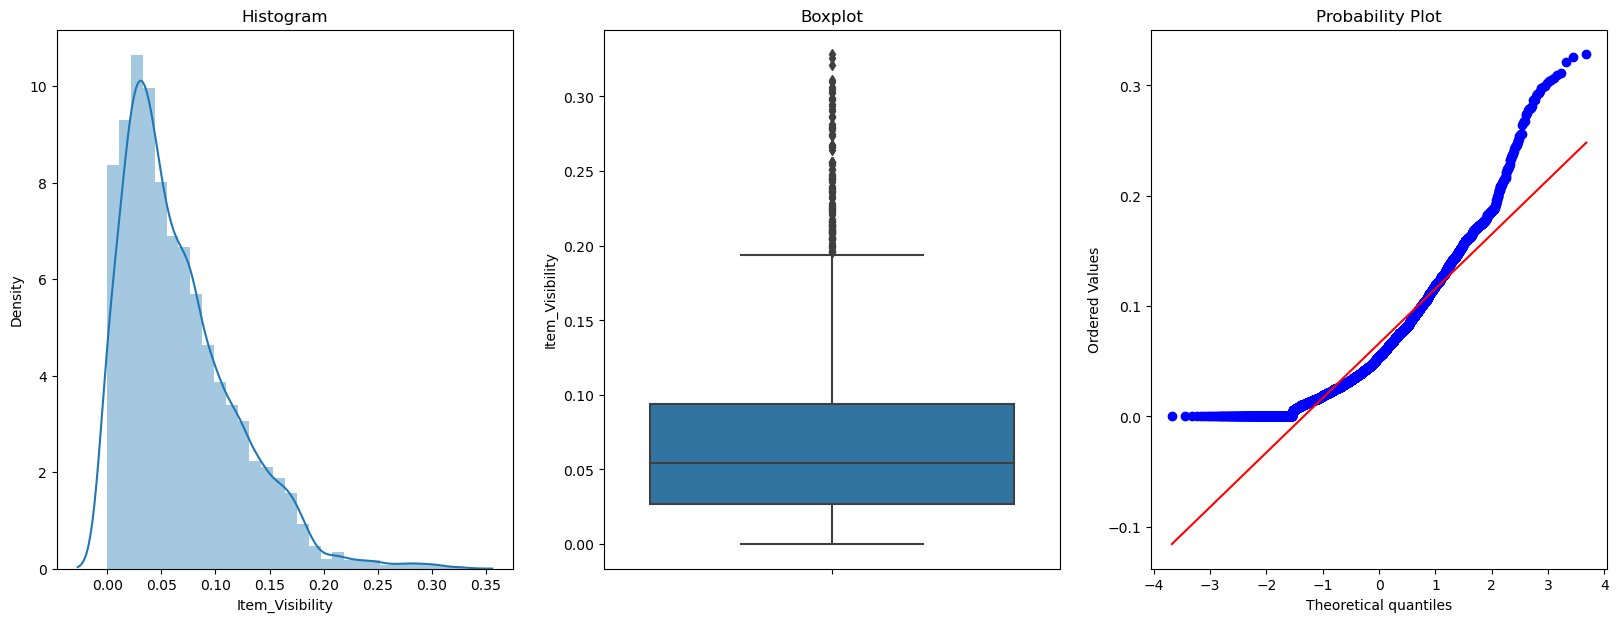

In [29]:
diagnostic_plots(X_train,'Item_Visibility')

C:\Users\user\AppData\Local\Temp\ipykernel_10464\2447837687.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins = 30)


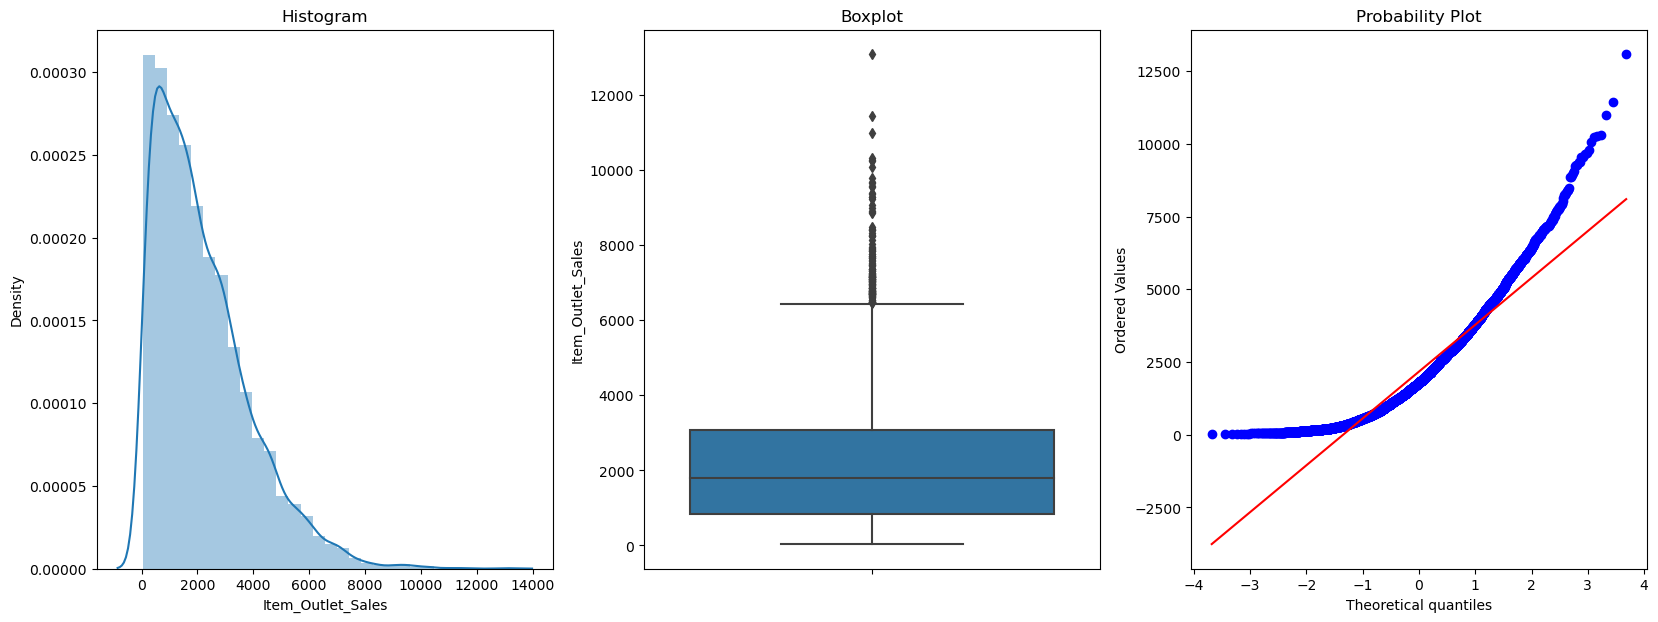

In [30]:
diagnostic_plots(pd.DataFrame(y_train, columns=["Item_Outlet_Sales"]),'Item_Outlet_Sales')

#### Making a decision 
For the handling of outliers, I will be using winsorisation for both variables. Instead of removing outliers, I want to replace them. This would prevent the removal of potentially useful data in my variables and also provide an unbiased representation of the data, as winsorisation is symmetric.

In [31]:
def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

#### Winsorisation for Item_Outlet_Sales

In [32]:
y_train_df = pd.DataFrame(y_train, columns=["Item_Outlet_Sales"])
y_train= winsorise(y_train_df, 'Item_Outlet_Sales', 
                                      y_train_df['Item_Outlet_Sales'].quantile(0.95), 
                                      y_train_df['Item_Outlet_Sales'].quantile(0.05))

In [33]:
y_test_df = pd.DataFrame(y_test, columns=["Item_Outlet_Sales"])
y_test= winsorise(y_test_df, 'Item_Outlet_Sales', 
                                      y_test_df['Item_Outlet_Sales'].quantile(0.95), 
                                      y_test_df['Item_Outlet_Sales'].quantile(0.05))

#### Winsorisation for Item_Visibility 

In [34]:
X_train['Item_Visibility']= winsorise(X_train, 'Item_Visibility', 
                                      X_train['Item_Visibility'].quantile(0.95), 
                                      X_train['Item_Visibility'].quantile(0.05))

In [35]:
X_test['Item_Visibility']= winsorise(X_test, 'Item_Visibility', 
                                      X_test['Item_Visibility'].quantile(0.95), 
                                      X_test['Item_Visibility'].quantile(0.05))

#### After Winsorisation

C:\Users\user\AppData\Local\Temp\ipykernel_10464\2447837687.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins = 30)


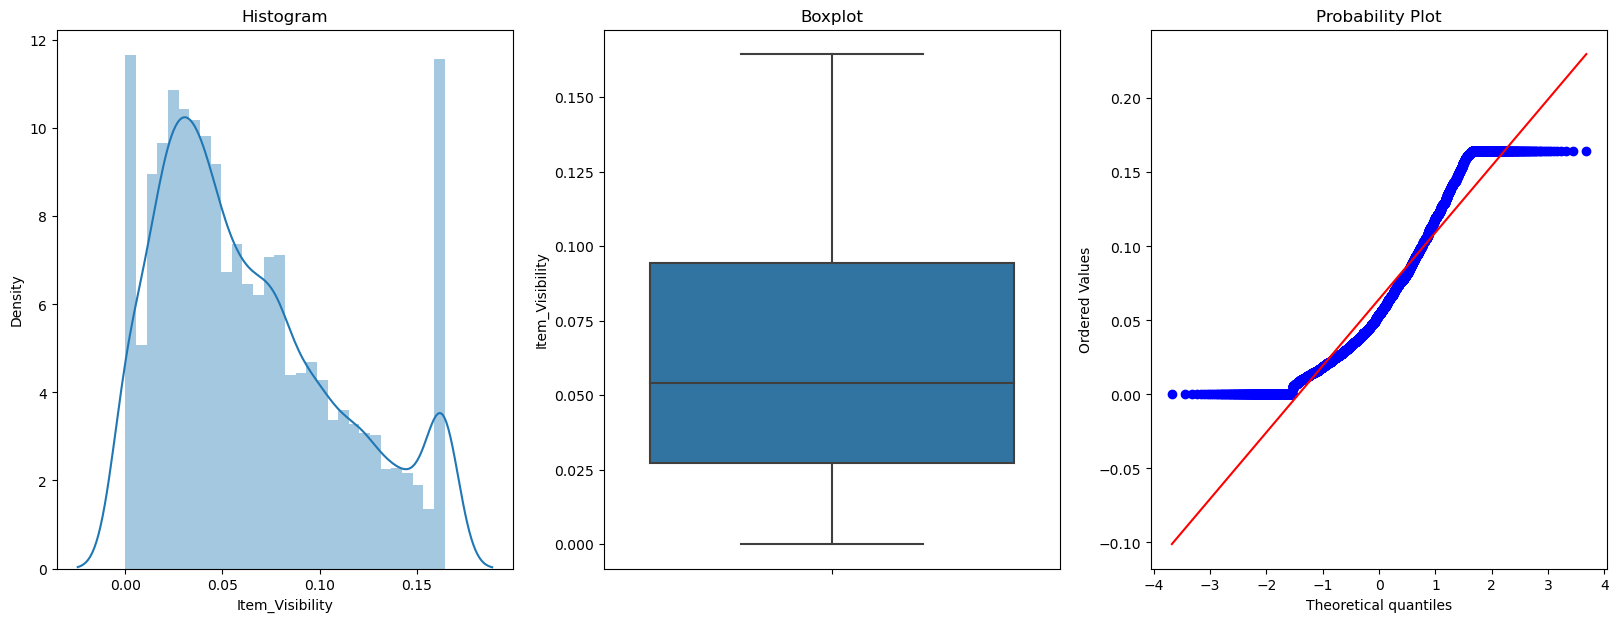

In [36]:
diagnostic_plots(X_train,'Item_Visibility')

C:\Users\user\AppData\Local\Temp\ipykernel_10464\2447837687.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins = 30)


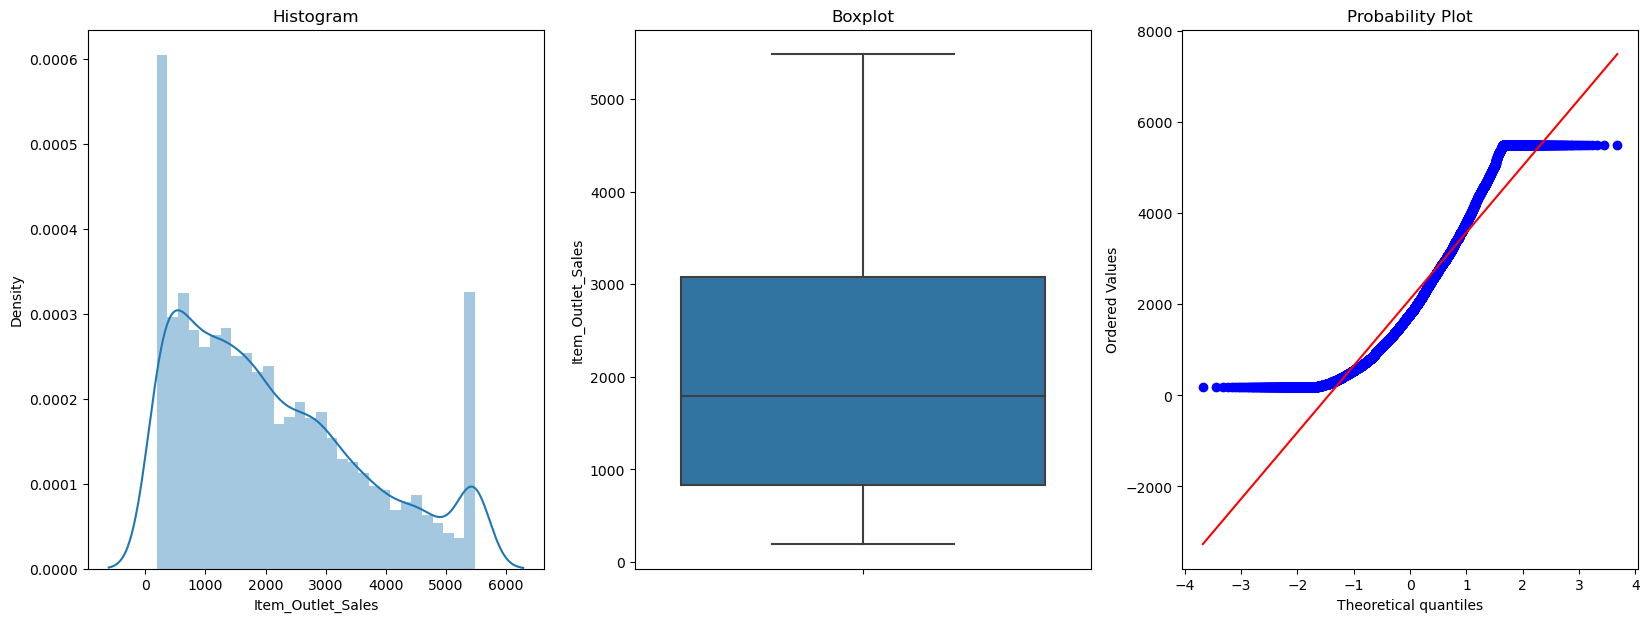

In [37]:
diagnostic_plots(pd.DataFrame(y_train, columns=["Item_Outlet_Sales"]),'Item_Outlet_Sales')

There are no more outliers, and the distributions for both variables lead toward the normal more. 

### 3.1.2 Handling Missing Values <a id="part3.1.2"></a> 

For the handling of missing values identified previously, I will be using an imputation pipeline to handle the null values. Let's take a look at the nulls in X_train.

In [38]:
X_train.isnull().mean()

Item_Weight                  0.171136
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.281763
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
dtype: float64

#### Item_Weight
As I do not want there to be outstanding values when I impute the nulls, I will be using mean imputation for this variable. Doing so will not affect the distribution drastically. (check again later) 


#### Outlet_Size
Let's take a look at the missing values found in Outlet_Size

In [39]:
X_train['Outlet_Size'].value_counts(dropna = False)

Medium    1962
Small     1686
NaN       1681
High       637
Name: Outlet_Size, dtype: int64

In [40]:
X_train.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts(dropna = False)

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1057
                      Medium          654
Tier 2                NaN            1294
                      Small           629
Tier 3                Medium         1308
                      High            637
                      NaN             387
Name: Outlet_Size, dtype: int64

In [41]:
X_train.loc[X_train["Outlet_Size"].isnull()]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
6813,5.98,Low Fat,0.043809,Fruits and Vegetables,146.8418,OUT017,2007,NaN,Tier 2,Supermarket Type1
4563,9.50,Low Fat,0.041066,Hard Drinks,223.5088,OUT017,2007,NaN,Tier 2,Supermarket Type1
6948,16.35,Low Fat,0.028443,Household,98.1410,OUT010,1998,NaN,Tier 3,Grocery Store
8229,16.70,Low Fat,0.102633,Canned,180.8292,OUT017,2007,NaN,Tier 2,Supermarket Type1
5213,7.30,Low Fat,0.086620,Frozen Foods,147.6076,OUT017,2007,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...
2222,19.35,Regular,0.049736,Fruits and Vegetables,76.8644,OUT045,2002,NaN,Tier 2,Supermarket Type1
3468,15.00,Low Fat,0.071516,Health and Hygiene,127.7362,OUT045,2002,NaN,Tier 2,Supermarket Type1
6744,19.85,Low Fat,0.064786,Health and Hygiene,123.7704,OUT017,2007,NaN,Tier 2,Supermarket Type1
4373,15.20,Low Fat,0.020280,Health and Hygiene,49.1034,OUT010,1998,NaN,Tier 3,Grocery Store


When inspecting the Outlet_Size,it can be seen here that the missing values in Outlet_Size are at random. Even though there are certain outlets types that follow certain size, I do not want the imputing of nulls to be biased. Hence I will be decising to replace the nulls with a 'Missing' indicator.

### Imputation
I will be using feature engine for the imputation, as it returns a dataframe immediately, making it more convenient.

In [42]:
features_num = ['Item_Weight']

features_cat_missing = ['Outlet_Size']

In [43]:
# using pipeline
pipe = Pipeline(steps=[
    ('imp_num_mean', mdi.MeanMedianImputer(imputation_method = 'mean', variables=features_num)),
    ('imp_cat_frequent', mdi.CategoricalImputer(variables = features_cat_missing)),
])

In [44]:
pipe.fit(X_train)

Pipeline(steps=[('imp_num_mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Item_Weight'])),
                ('imp_cat_frequent',
                 CategoricalImputer(variables=['Outlet_Size']))])

In [45]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [46]:
X_train.isnull().mean()

Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
dtype: float64

### 4. Data Transformation <a id="part4"></a> 
Data Transformation is an essential step in data preprocessing and data wrangling, as it is the process of changing the format, structure, or values of data for modelling.

In this segment, I will be transforming the numerical and categorical variables in my dataset.

### 4.1 Categorical Variables <a id="part4.1"></a>
For the categorical variables, I will need to regroup the variables with rare categories, and followed by the encoding of the variables. 

### 4.1.1 Regrouping of rare categories <a id="part4.1.1"></a> 
Let's take a look at the variables with rare categories identified previously in X_train.
- Item_Fat_Content
- Item_Type

#### Item_Fat_Content
Previously, when we checked Item_Fat_Content, we found that there were values that meant the same thing but were typed differently. This could be due to spelling errors, or different intepretation of the same categorical values (shown below)

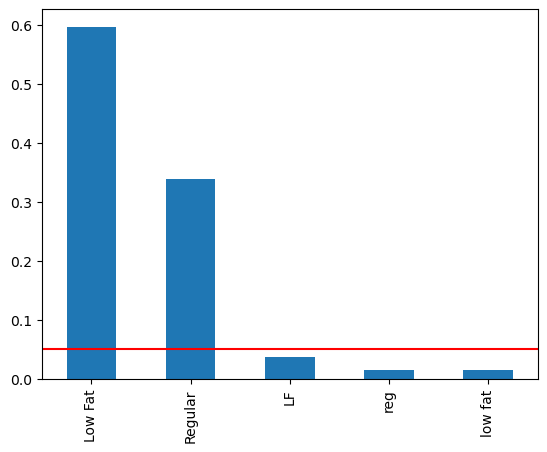

In [47]:
label_fat = X_train['Item_Fat_Content'].value_counts() / len(X_train)

fig = label_fat.sort_values(ascending=False).plot.bar()

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

plt.show()

In [48]:
# regrouping the values 
# X_train
X_train['Item_Fat_Content'] = X_train['Item_Fat_Content'].replace({'LF':'Low Fat'})
X_train['Item_Fat_Content'] = X_train['Item_Fat_Content'].replace({'low fat':'Low Fat'})
X_train['Item_Fat_Content'] = X_train['Item_Fat_Content'].replace({'reg':'Regular'})

# X_test
X_test['Item_Fat_Content'] = X_test['Item_Fat_Content'].replace({'LF':'Low Fat'})
X_test['Item_Fat_Content'] = X_test['Item_Fat_Content'].replace({'low fat':'Low Fat'})
X_test['Item_Fat_Content'] = X_test['Item_Fat_Content'].replace({'reg':'Regular'})

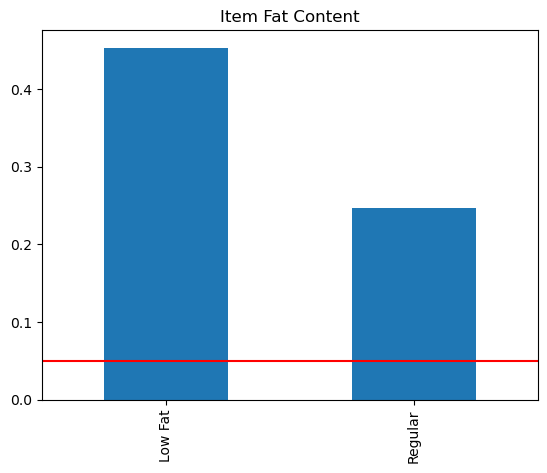

In [49]:
# after regrouping
label_fat = X_train['Item_Fat_Content'].value_counts() / len(data)

fig = label_fat.sort_values(ascending=False).plot.bar()

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

plt.title('Item Fat Content')
plt.show()

#### Item_Type 

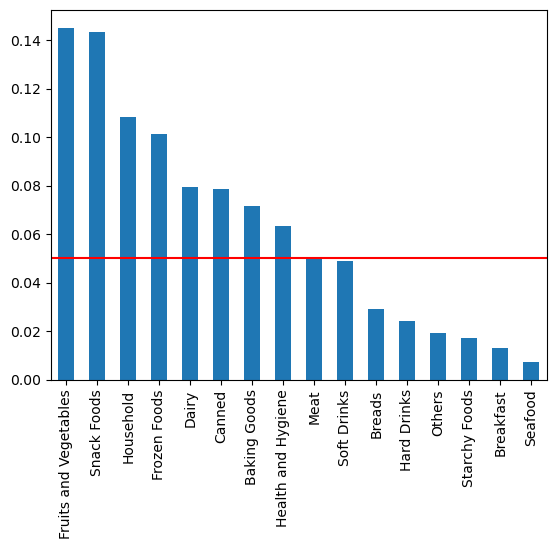

In [50]:
label_item = X_train['Item_Type'].value_counts(normalize = True)

fig = label_item.sort_values(ascending=False).plot.bar()

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

plt.show()

In [51]:
def find_frequent_labels(df, variable, tolerance):
    
    temp = df[variable].value_counts()  / len(df)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

In [52]:
frequent_cat = find_frequent_labels(X_train, 'Item_Type', 0.05)

In [53]:
[x for x in X_train['Item_Type'].unique() if x not in frequent_cat]

['Hard Drinks',
 'Starchy Foods',
 'Breads',
 'Seafood',
 'Breakfast',
 'Soft Drinks',
 'Others']

In [54]:
X_train['Item_Type'] = np.where(X_train['Item_Type'].isin(frequent_cat), X_train['Item_Type'], 'Others')
    
X_test['Item_Type'] = np.where(X_test['Item_Type'].isin(frequent_cat), X_test['Item_Type'], 'Others')

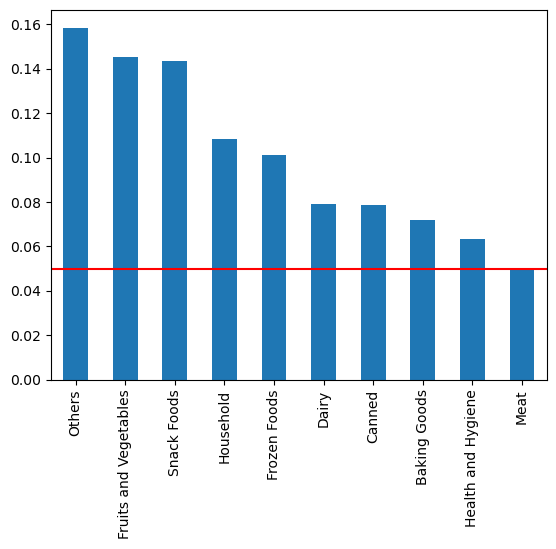

In [55]:
# after regrouping 

label_item = X_train['Item_Type'].value_counts(normalize = True)

fig = label_item.sort_values(ascending=False).plot.bar()

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

plt.show()

### 4.1.2 Categorical Encoding <a id="part4.1.2"></a>
Before encoding, I wil need to check the cardinality and the nature of the categorical variables, which will influence the encoding method I will do for each variable.

Text(0.5, 1.0, 'Cardinality')

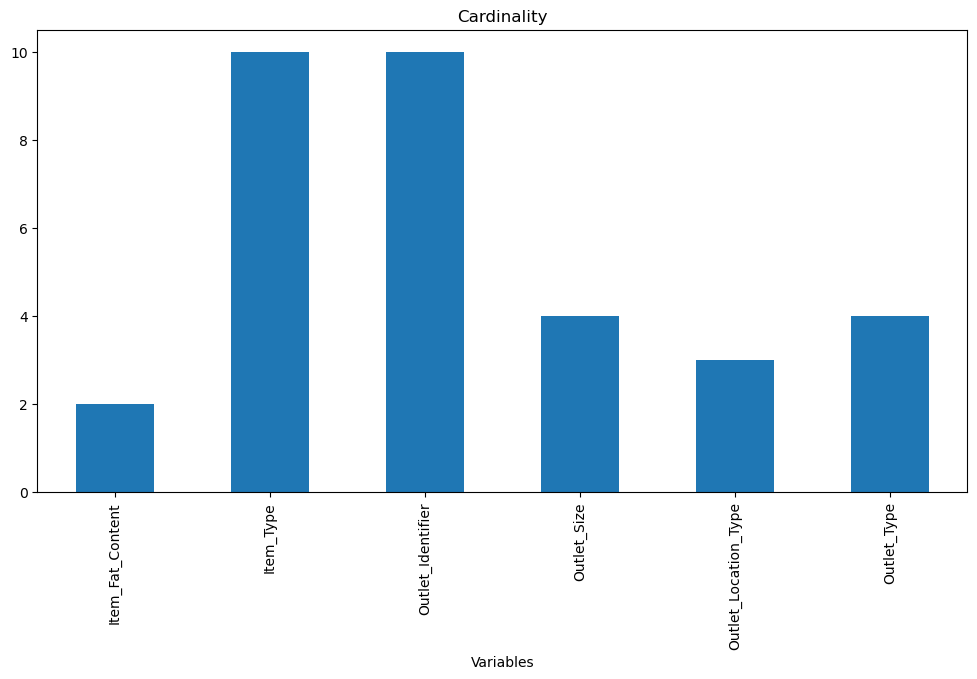

In [56]:
X_train[cat_cols].nunique().plot.bar(figsize=(12,6))

plt.xlabel('Variables')
plt.title('Cardinality')

### Making a decision 
#### One-Hot Encoding  - the cardinality of the variables are appropriate, it will not create problems for dimensionality later. 
- Outlet_Type 
- Item_Fat_Content

#### Ordinal Encoding - variables have no hierarchy, and only represent a category
- Outlet_Identifier
- Item_Type

#### Ordered Ordinal Encoding - the variables are represented in a hierarchy
- Outlet_Location_Type
- Outlet_Size 

#### One-Hot Encoding 

In [57]:
ohe_vars = ['Outlet_Type' ,'Item_Fat_Content']

In [58]:
ohe_enc = OneHotEncoder(variables=ohe_vars)

In [59]:
ohe_enc.fit(X_train)

OneHotEncoder(variables=['Outlet_Type', 'Item_Fat_Content'])

In [60]:
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

In [61]:
X_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type2,Item_Fat_Content_Regular,Item_Fat_Content_Low Fat
88,6.305000,0.123116,Snack Foods,95.6436,OUT046,1997,Small,Tier 1,1,0,0,0,1,0
6813,5.980000,0.043809,Fruits and Vegetables,146.8418,OUT017,2007,Missing,Tier 2,1,0,0,0,0,1
4046,12.929873,0.072317,Household,160.7920,OUT027,1985,Medium,Tier 3,0,1,0,0,0,1
8194,12.929873,0.164398,Dairy,157.8630,OUT019,1985,Small,Tier 1,0,0,1,0,1,0
8293,9.100000,0.080278,Household,47.2718,OUT035,2004,Small,Tier 2,1,0,0,0,0,1


#### Ordinal Encoding 

In [62]:
vars_categorical = ['Outlet_Identifier','Item_Type']

ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=vars_categorical)

In [63]:
ordinal_enc.fit(X_train)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['Outlet_Identifier', 'Item_Type'])

In [64]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

#### Ordered Ordinal Encoding

In [65]:
ord_vars = ['Outlet_Location_Type','Outlet_Size']

ordinal_enc = OrdinalEncoder(
    encoding_method='ordered',
    variables = ord_vars)

In [66]:
ordinal_enc.fit(X_train, y_train)

OrdinalEncoder(variables=['Outlet_Location_Type', 'Outlet_Size'])

In [67]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

In [68]:
# final encoded categorical variables 
X_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type2,Item_Fat_Content_Regular,Item_Fat_Content_Low Fat
88,6.305000,0.123116,0,95.6436,0,1997,1,0,1,0,0,0,1,0
6813,5.980000,0.043809,1,146.8418,1,2007,0,2,1,0,0,0,0,1
4046,12.929873,0.072317,2,160.7920,2,1985,3,1,0,1,0,0,0,1
8194,12.929873,0.164398,3,157.8630,3,1985,1,0,0,0,1,0,1,0
8293,9.100000,0.080278,2,47.2718,4,2004,1,2,1,0,0,0,0,1


### 4.2 Numerical Transformation <a id="part4.2"></a>
Numerical transformation neccesary for making the distribution of certain variables normal or fitting the line in the probability plot. Let's inspect the continuous numerical variables in X_train, then evaluate from there. 

C:\Users\user\AppData\Local\Temp\ipykernel_10464\2447837687.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins = 30)


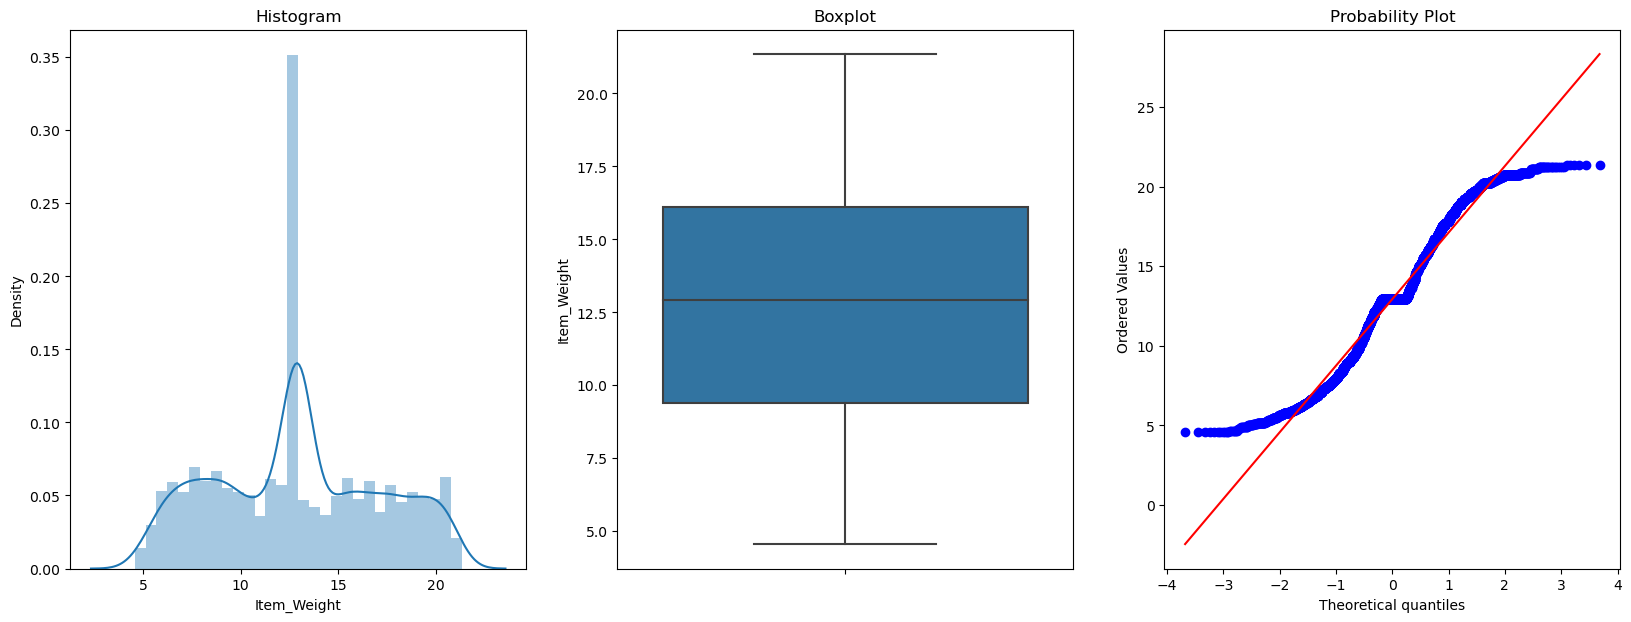

In [69]:
diagnostic_plots(X_train,'Item_Weight')

- almost normal distribution, line can be fit better

C:\Users\user\AppData\Local\Temp\ipykernel_10464\2447837687.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins = 30)


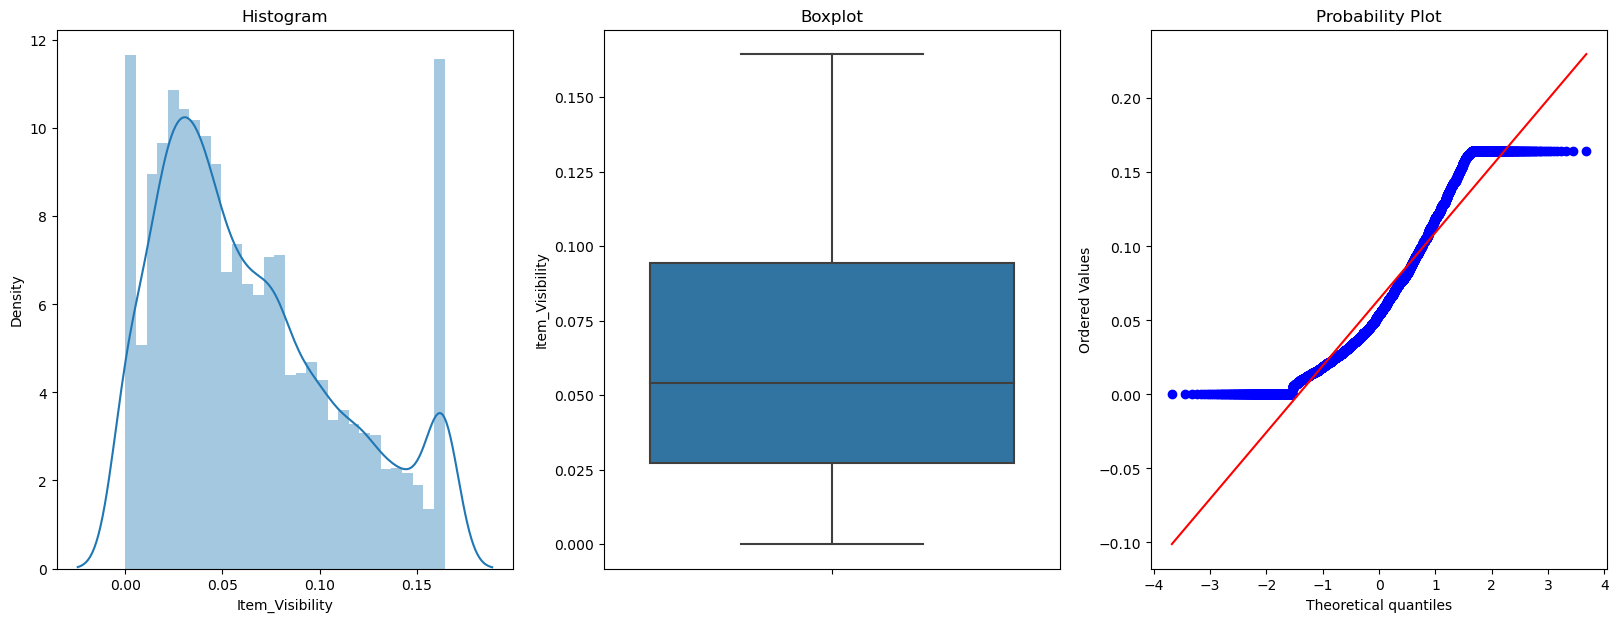

In [70]:
diagnostic_plots(X_train,'Item_Visibility')

- right skewed distribution, line fits relatively well 

C:\Users\user\AppData\Local\Temp\ipykernel_10464\2447837687.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins = 30)


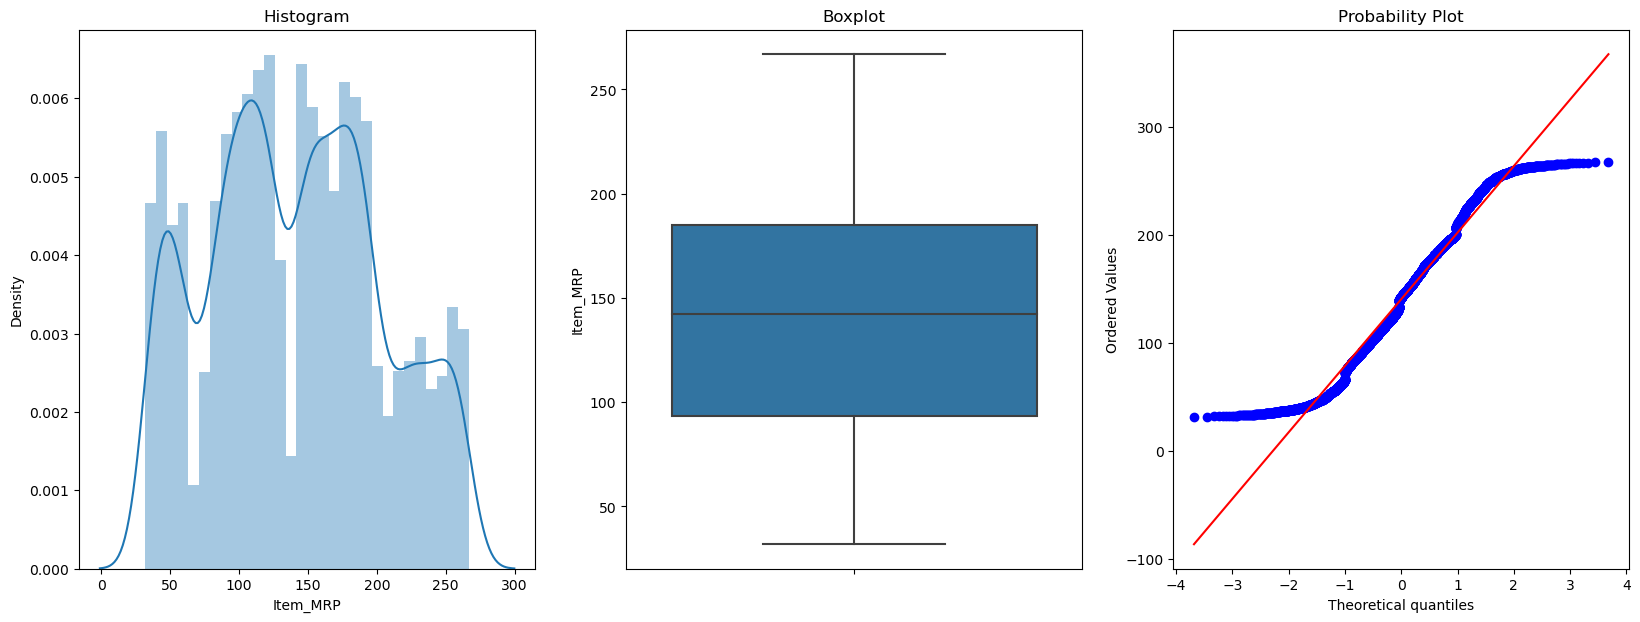

In [71]:
diagnostic_plots(X_train,'Item_MRP')

- irregular distribution, line fits well

### Making a decision - Transformation
For most of the variables, the probability plot line is favourable as most fit the line rendering them relatively normal. Hence most of them do not require any numerical transformation to change its distributions. 

However, I will still be trying to transform them in order to get the best result possible.

These are the possible techniques that can be used to transform the variables.

#### Cannot be done on Item_Visibility - contains zeros 
- Logarithmic Transformation
- Reciprocal Function 
- Box Cox Transformation
#### Can be done on all continuous variables 
- Cube and Square root
- Power Transformation 
- Yeo Johnson Transformation 

### Logarithmic Transformation

In [72]:
### code used 
# X_train[['Item_MRP','Item_Weight']] = np.log(
    # X_train[['Item_MRP','Item_Weight']])

#### Results  

#### Item Weight 
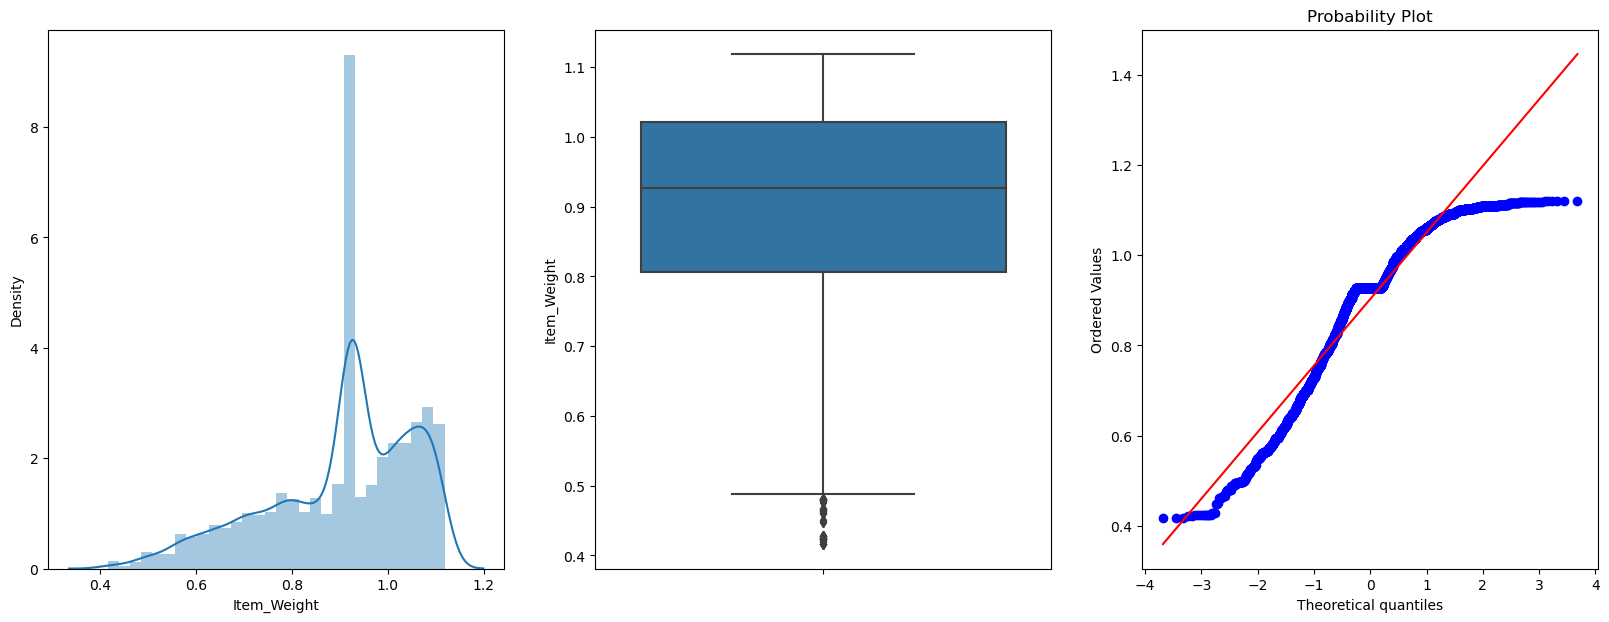
- caused distribution to be skewed left
- introduced outliers

#### Item_MRP 
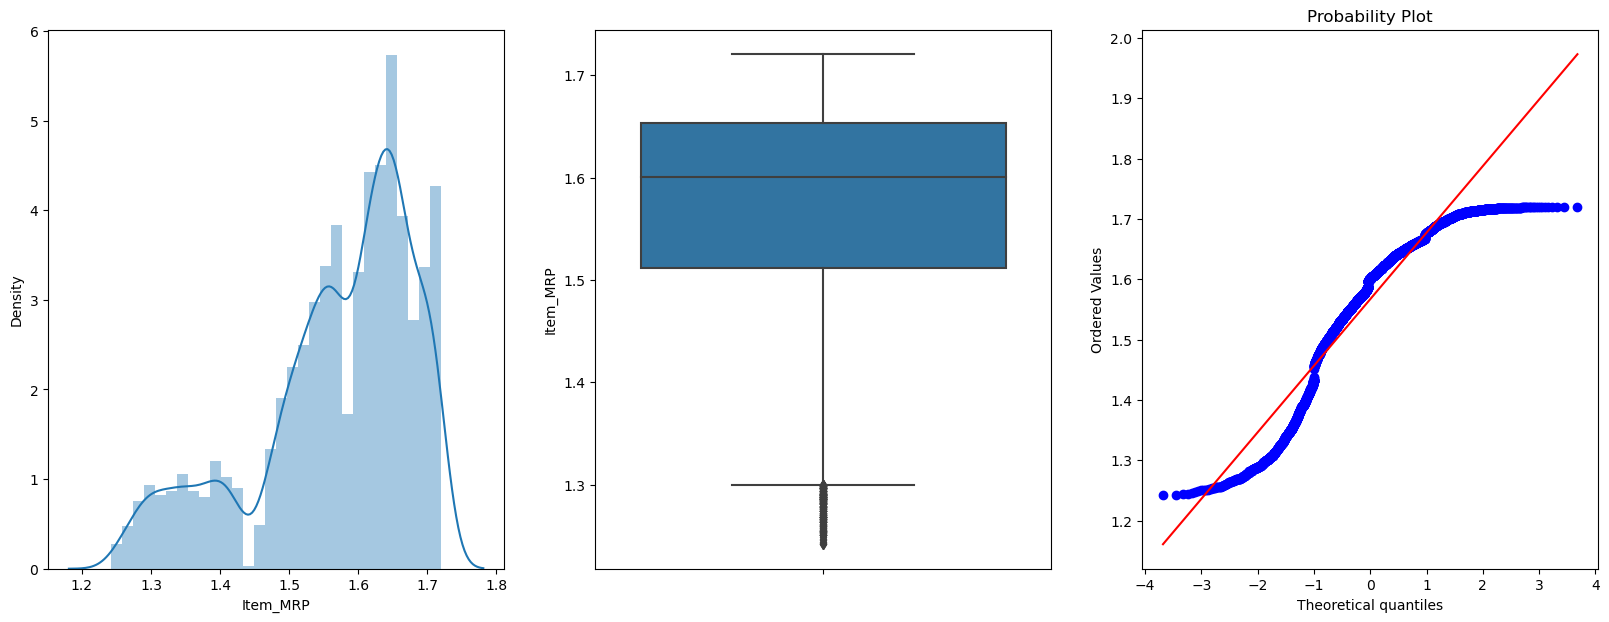
- distribution caused distribution to be skewed left
- introduced outliers

### Reciprocal Function 

In [73]:
# code used
# X_train[['Item_MRP','Item_Weight']] = np.reciprocal(X_train[['Item_MRP','Item_Weight']])

#### Item Weight
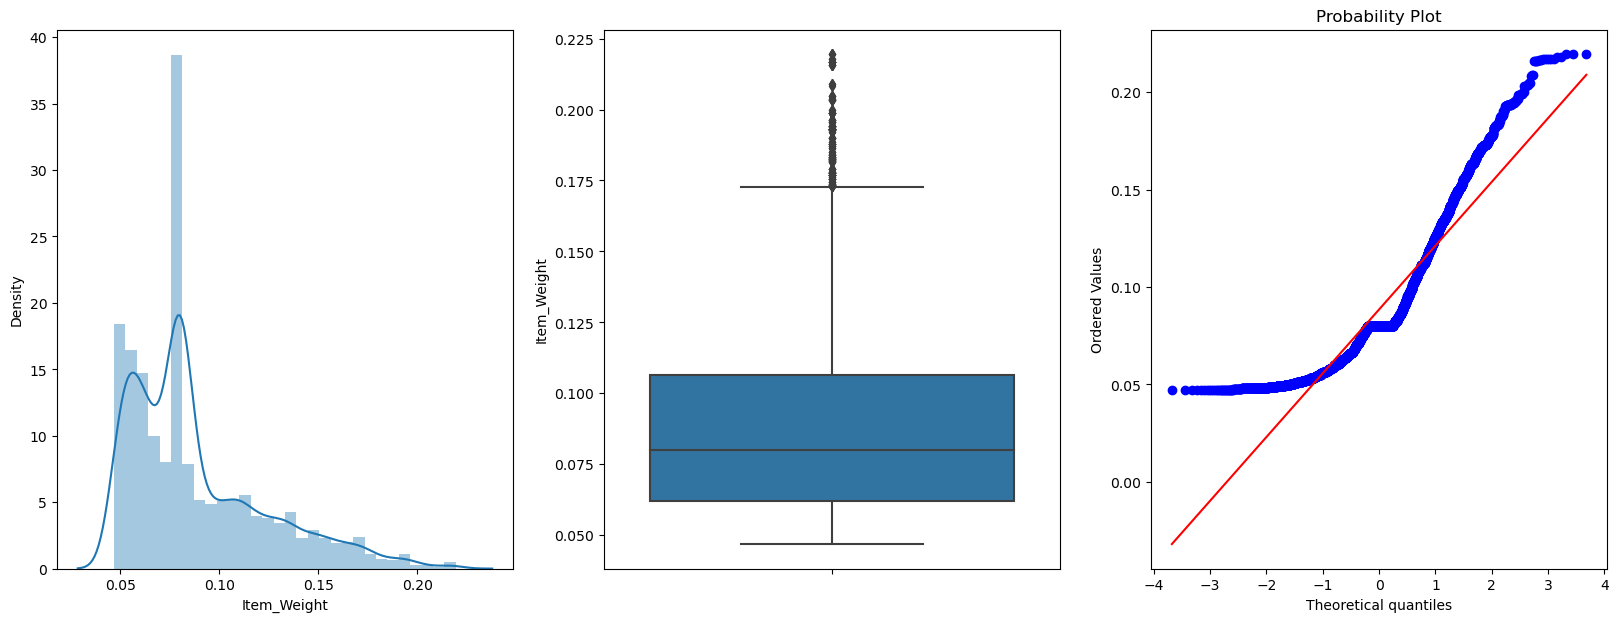
- caused distribution to be skewed right
- introduced outliers

#### Item_MRP 
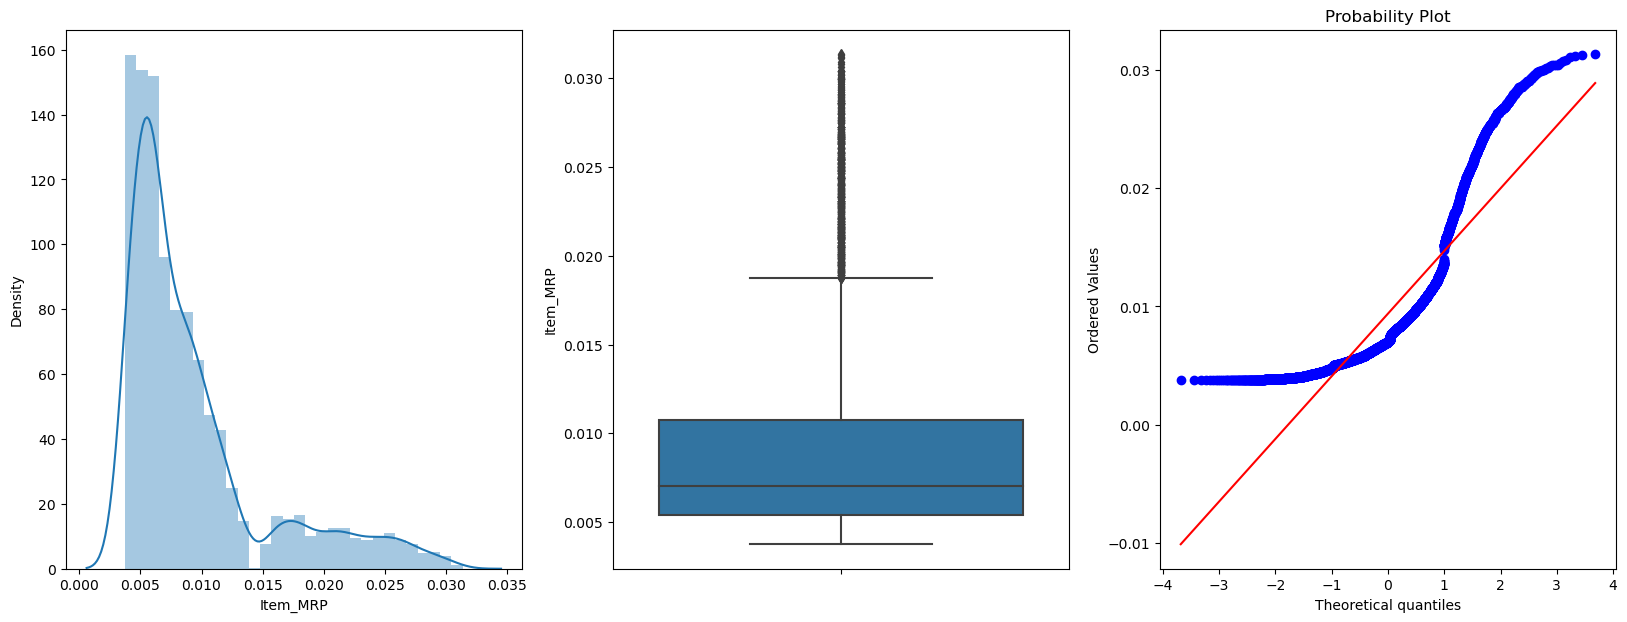
- caused distribution to be skewed right
- introduced outliers

### Square and Cube Root 

In [74]:
# code used 
# X_train[cont_vars] = np.sqrt(X_train[cont_vars])

#### Item_Visibility
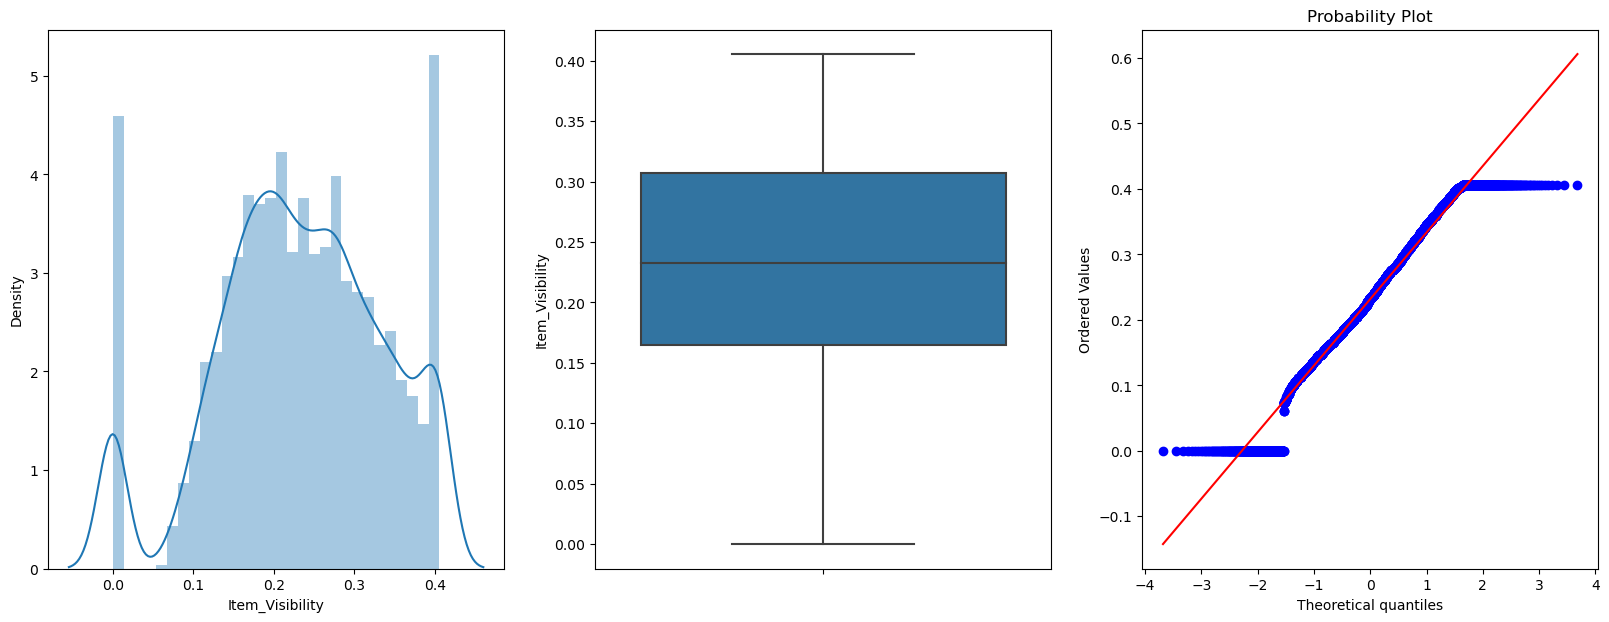
- split a segment of the variables

#### Item_Weight
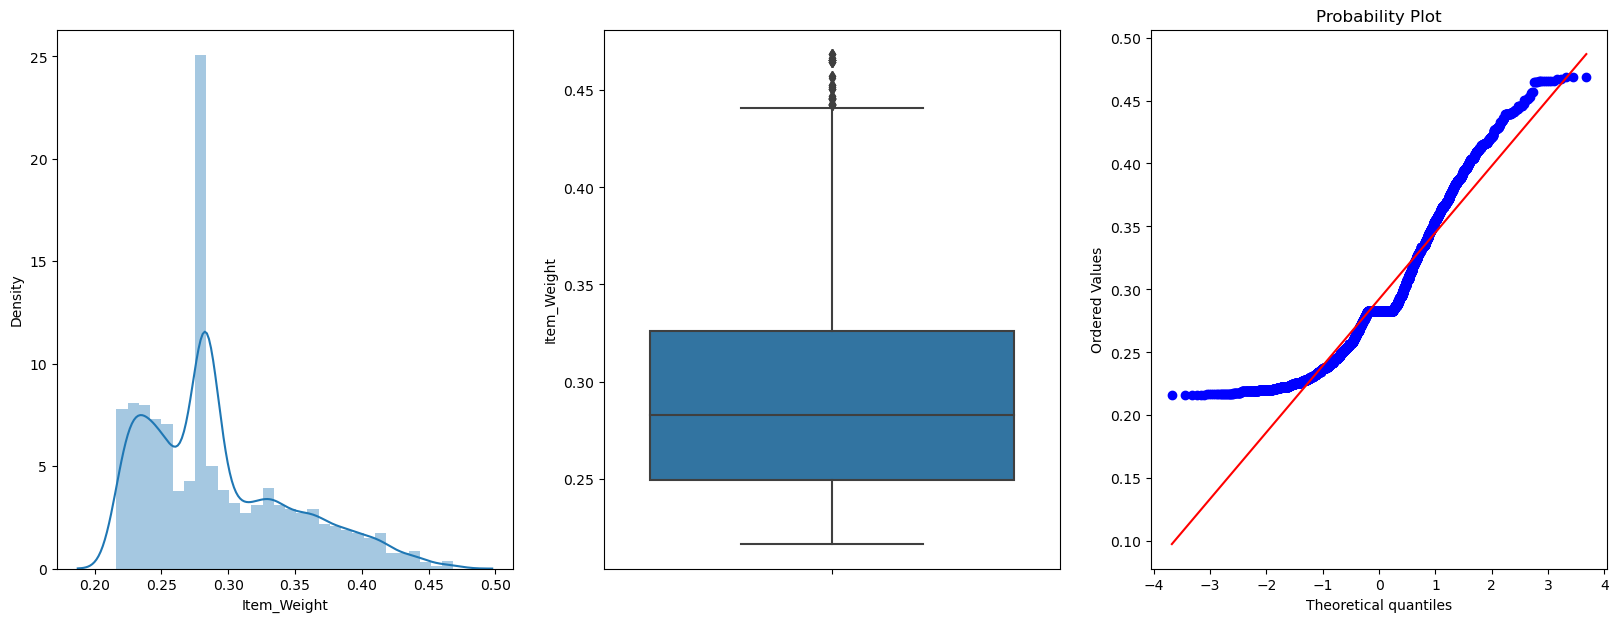
- outliers introduced
- distribution skewed right

#### Item_MRP 
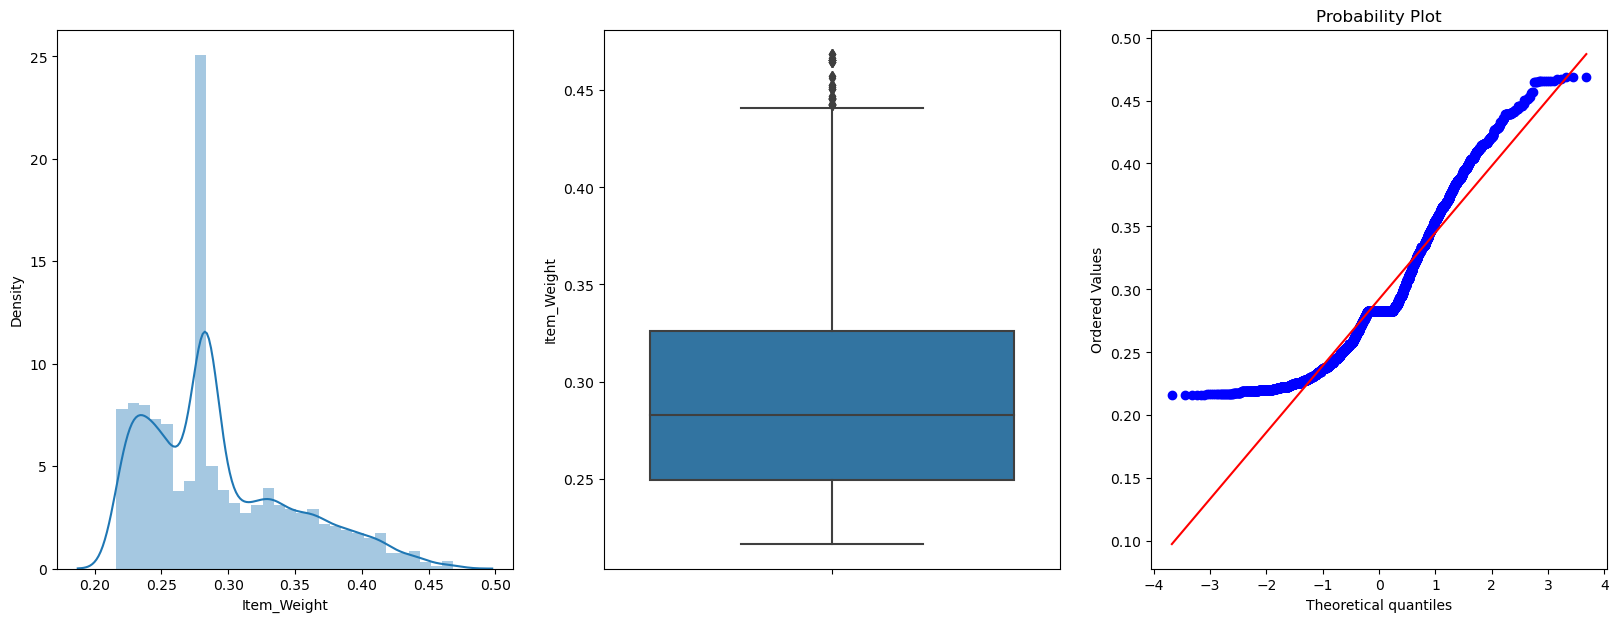
- outliers introduced
- distribution skewed right

### Power Transformation

In [75]:
# code used 
# X_train[cont_vars] = np.power(X_train[cont_vars], 0.3)

#### Item_Visibility
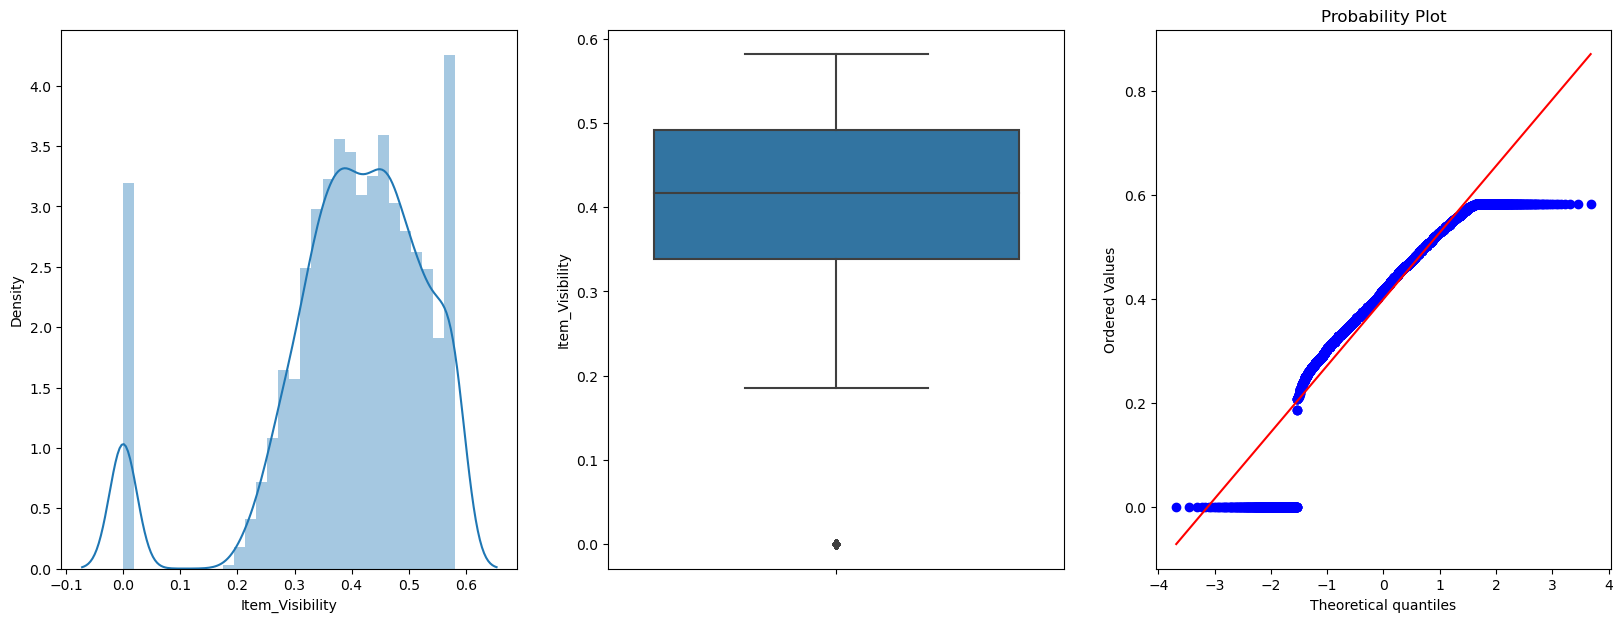
- distribution skewed left
- outliers introduced 

#### Item_Weight 
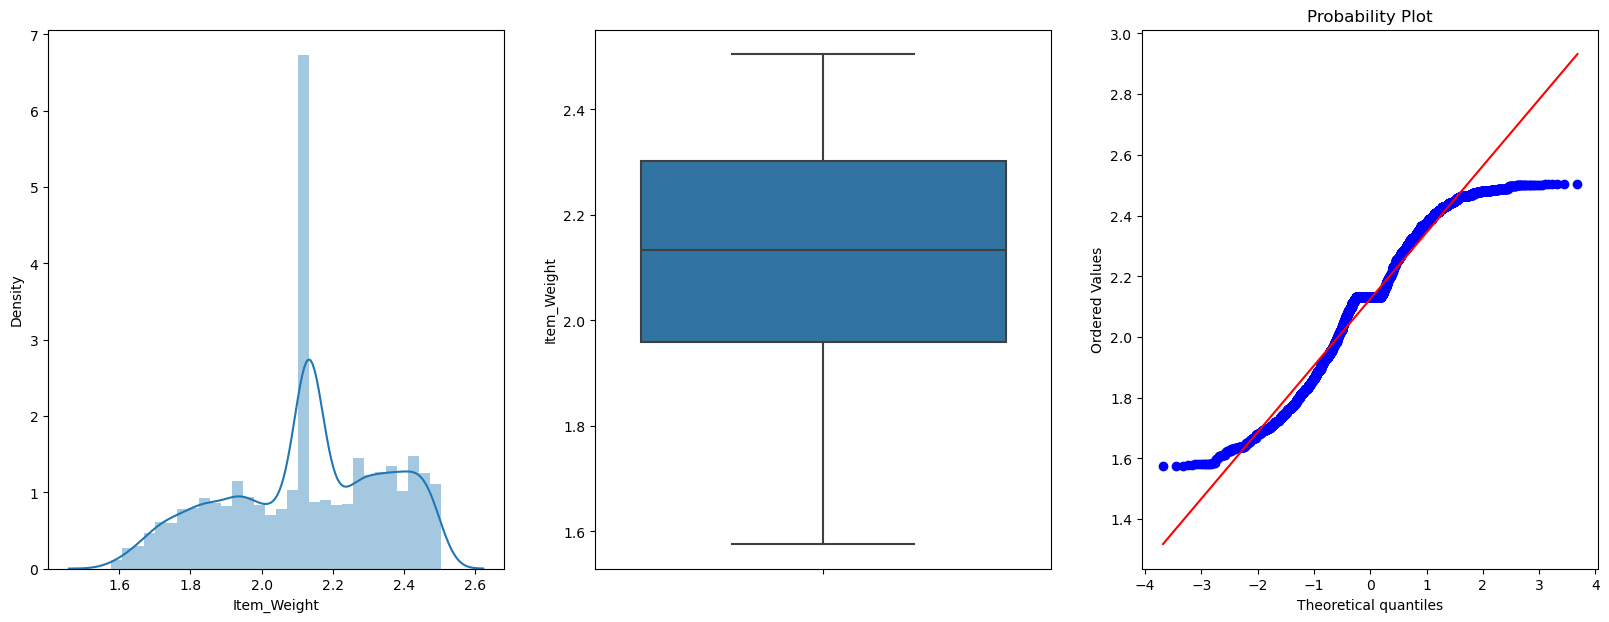
- caused the data to be less symmetrical

#### Item_MRP
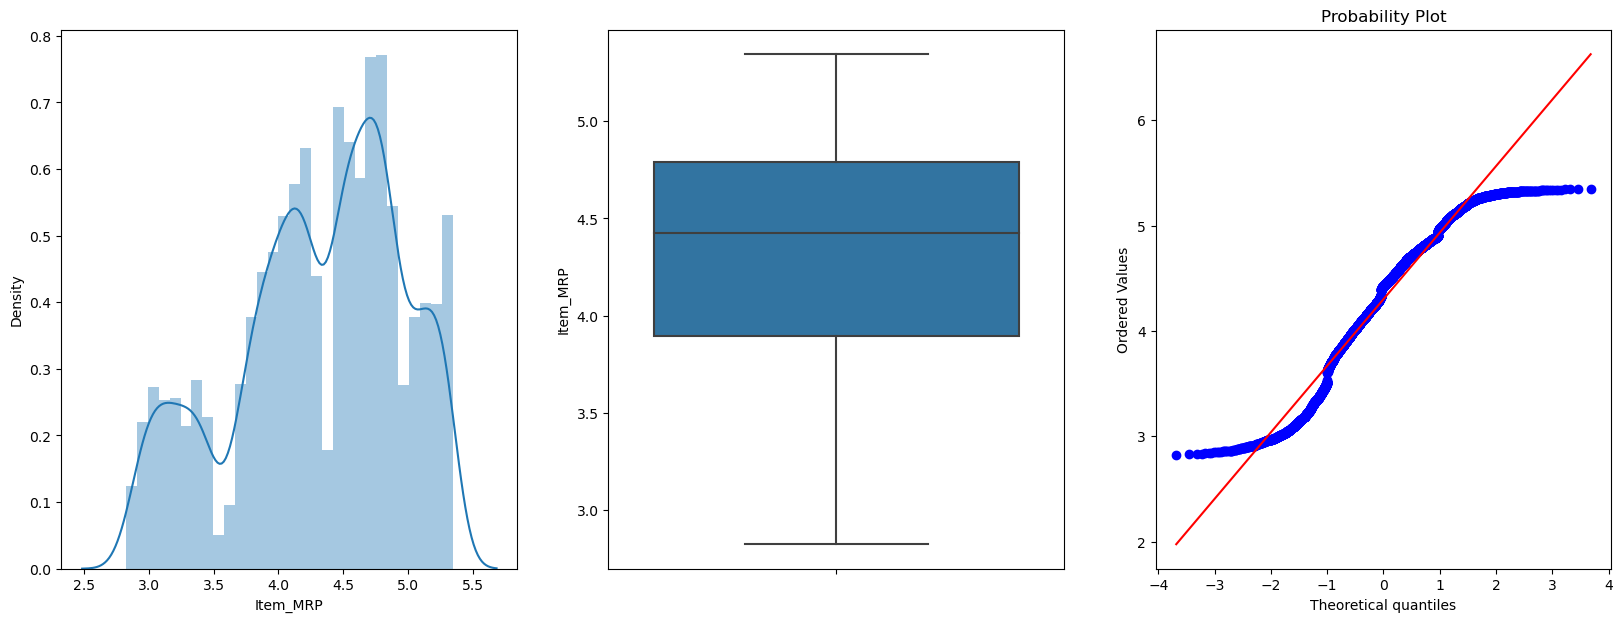
- caused the data to be less symmetrical

### Box Cox Transformation

In [76]:
# code used 
# from feature_engine.transformation import BoxCoxTransformer

# bct = BoxCoxTransformer(variables = ['Item_MRP','Item_Weight'])

# fit transformer to the data set
# bct.fit(X_train)

# X_train = bct.transform(X_train)

#### Item_Weight
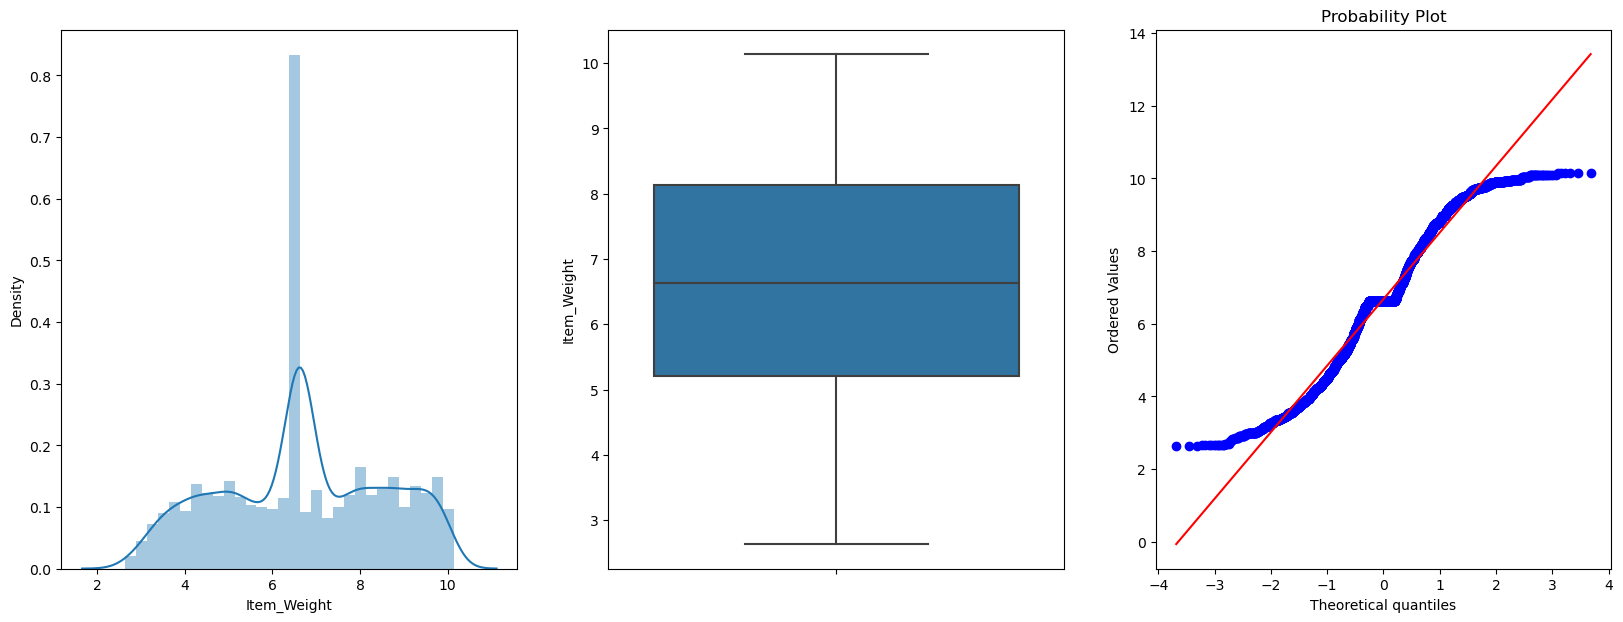
- similar to before transformation 

#### Item_MRP
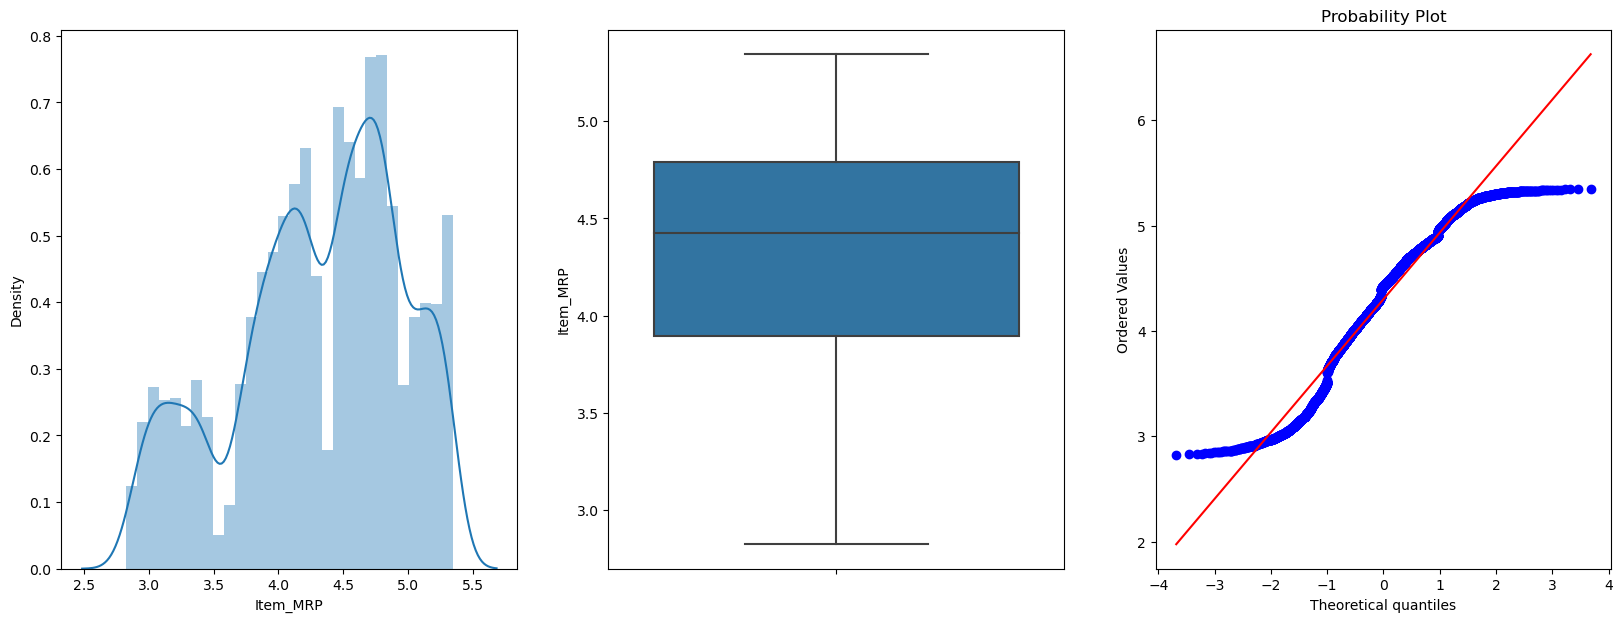
- similar to before transformation

### Conclusion 
For numerical transformation, I will be using the Yeo-Johnson Transformation technique.It is an extension of the Box-Cox technique, but can still be used on zero or values, which are found in Item_Visibility. I believe it will produce the best results : 
- variables will exhibit symmetrical distributions
- line will better fit the normal 

From my comparisons above, the other techniques were not suitable as : 
- caused the variables to have skewed distributions
- introduced outliers for certain transformations. 

However, I will only be doing it for Item_Visibility, Item_Weight and Item_MRP already had normal distributions. 

### Yeo-Johnson Transformation

In [77]:
yjt = YeoJohnsonTransformer(variables = ['Item_Visibility'])

yjt.fit(X_train)

X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)

### After Transformation

C:\Users\user\AppData\Local\Temp\ipykernel_10464\2447837687.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins = 30)


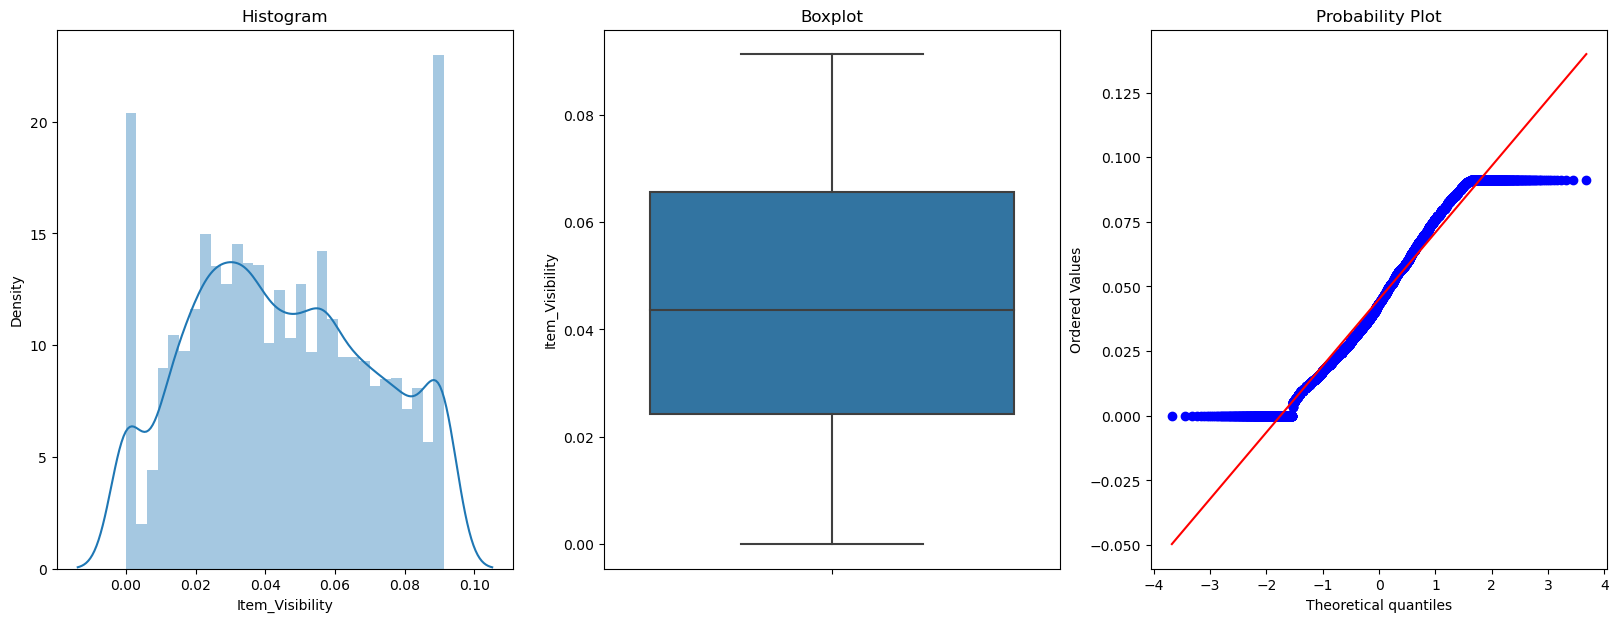

In [78]:
diagnostic_plots(X_train,'Item_Visibility')

C:\Users\user\AppData\Local\Temp\ipykernel_10464\2447837687.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins = 30)


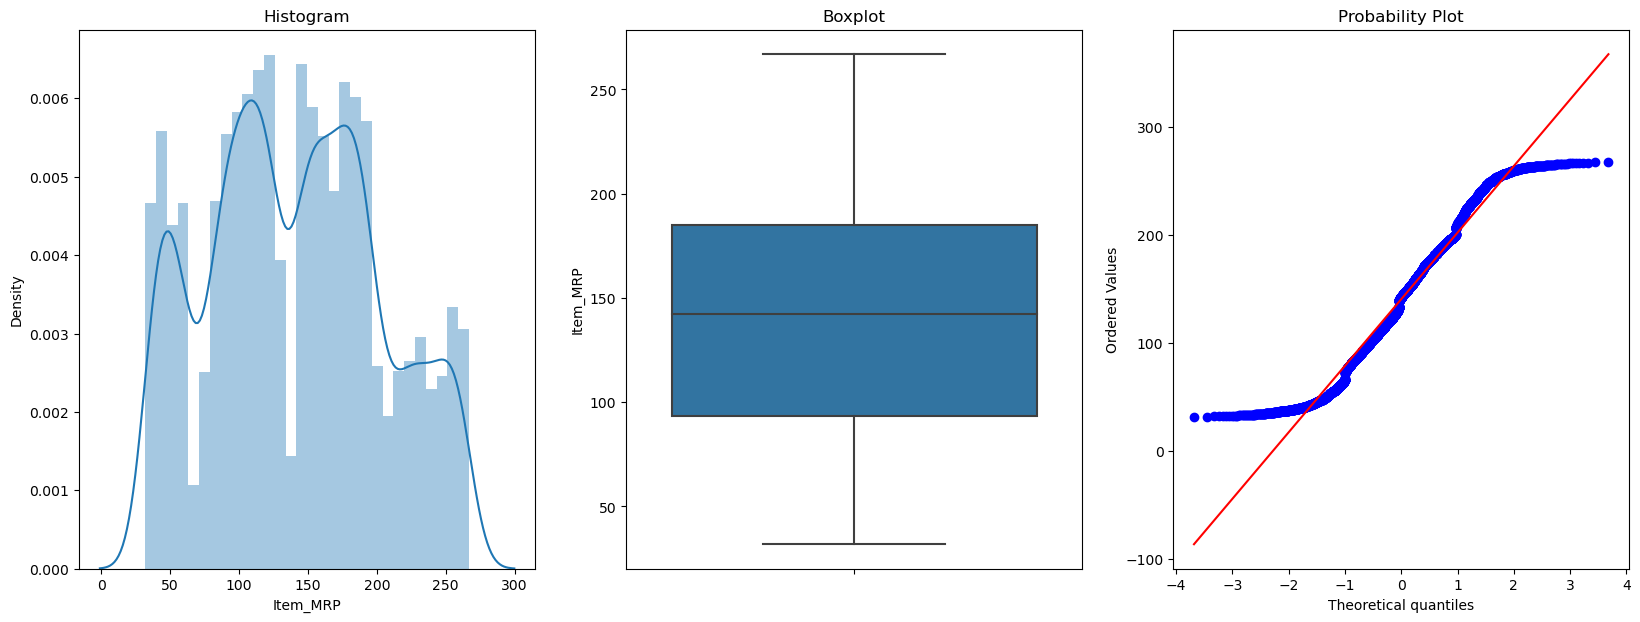

In [79]:
diagnostic_plots(X_train,'Item_MRP')

C:\Users\user\AppData\Local\Temp\ipykernel_10464\2447837687.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins = 30)


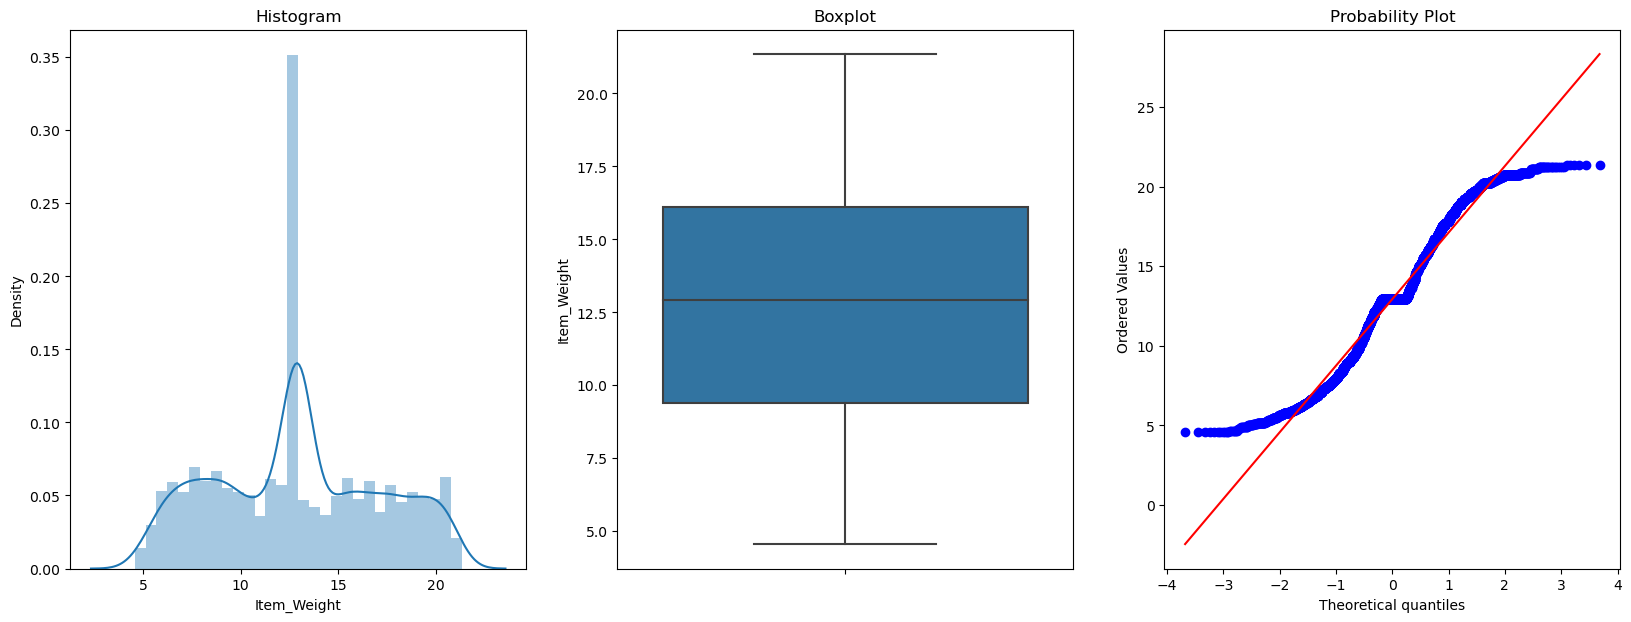

In [80]:
diagnostic_plots(X_train,'Item_Weight')

Using the Yeo-Johnson Technique, I have achieved satisfactory results for the transformation of the numerical variables. 

### 4.2.1 Discretization/Binning<a id="part4.2.1"></a>  

Discretizing continuous data simplifies its representation and reduces the complexity of analysis. It converts a potentially infinite number of values into a finite set of categories, making it easier to understand and work with the data.

However, I will not be doing discretization as I do not want to simplify my data, I feel that it would be better for my model to learn with more data points and values.

One of the uses for discretization techniques is also the handling of outliers. However I have already done this step previously, hence I feel that discretization is not needed for the building of my model.

### 5. Feature Engineering <a id="part5"></a>

### 5.1 Feature Scaling <a id="part5.1"></a>
In machine learning and data preprocessing, feature scaling is a technique used to normalize or standardize the features (variables) of a dataset. It involves transforming the numerical values of features to a specific range or distribution, allowing the algorithms to perform better during training and improving the accuracy and efficiency of the models.

For the scaling of the features, I will be using standardisation.

### Standardisation 

Standardization is the process of centering the variable at zero and standardizing the variance to 1. To standardize features, we subtract the mean from each observation and then divide the result by the standard deviation:

\begin{equation}
z = \frac{x - mean(x)}{std(x)}
\end{equation}

The result of the preceding transformation is called the z-score and represents how many standard deviations a given observation deviates from the mean. 

For standardisation, I will only be doing them for continuous variables. 

In [81]:
# set up the scalerscaler = StandardScaler()
scaler = StandardScaler()

cont_cols = ['Item_MRP','Item_Visibility','Item_Weight']
scaler.fit(X_train[cont_cols])
# transform train and test sets

X_train_scaled = X_train.copy()
X_train_scaled[cont_cols] =  scaler.transform(X_train[cont_cols])

X_test_scaled = X_test.copy()
X_test_scaled[cont_cols] =  scaler.transform(X_test[cont_cols])

scaler.fit(pd.DataFrame(y_train,columns = ['Item_Outlet_Sales']))

StandardScaler()

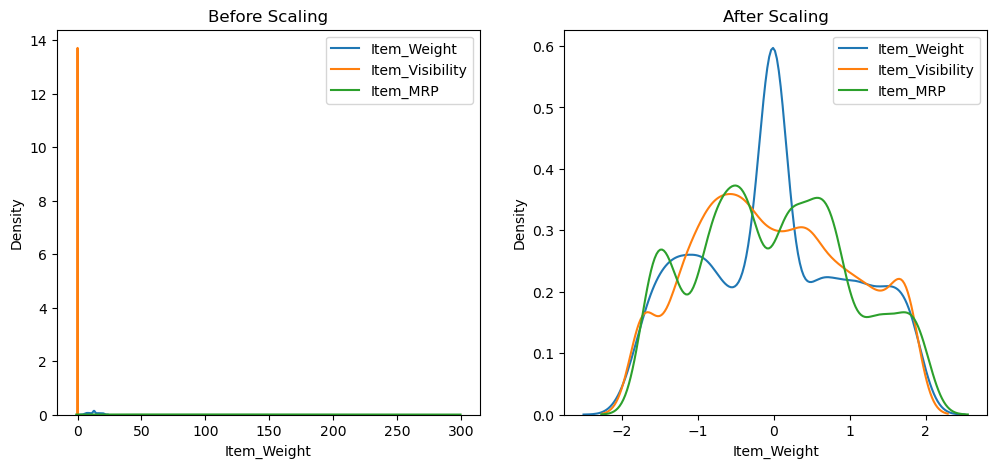

In [82]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Item_Weight'], ax=ax1, label ='Item_Weight')
sns.kdeplot(X_train['Item_Visibility'], ax=ax1, label ='Item_Visibility')
sns.kdeplot(X_train['Item_MRP'], ax=ax1, label ='Item_MRP')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Item_Weight'], ax=ax2, label ='Item_Weight')
sns.kdeplot(X_train_scaled['Item_Visibility'], ax=ax2, label ='Item_Visibility')
sns.kdeplot(X_train_scaled['Item_MRP'], ax=ax2, label ='Item_MRP')
ax2.legend()
plt.show()

In [83]:
X_train = X_train_scaled 
X_test = X_test_scaled 

### 5.2 Feature Creation <a id="part5.2"></a> 
### Polynomial Expansion

Existing variables can be combined to create new insightful features. A polynomial combination of the same feature, can be quite informative or increase the predictive power of our algorithms. For example, in cases where the target follows a quadratic relationship with a variable, creating a second degree polynomial of the feature allows us to use it in a linear model. It can help to improve the model's predictive power.

Polynomial combinations of variables can return new variables that provide additional information. This can result in better inputs for the machine learning model. 

In [84]:
X_train = X_train.reset_index(drop=True)

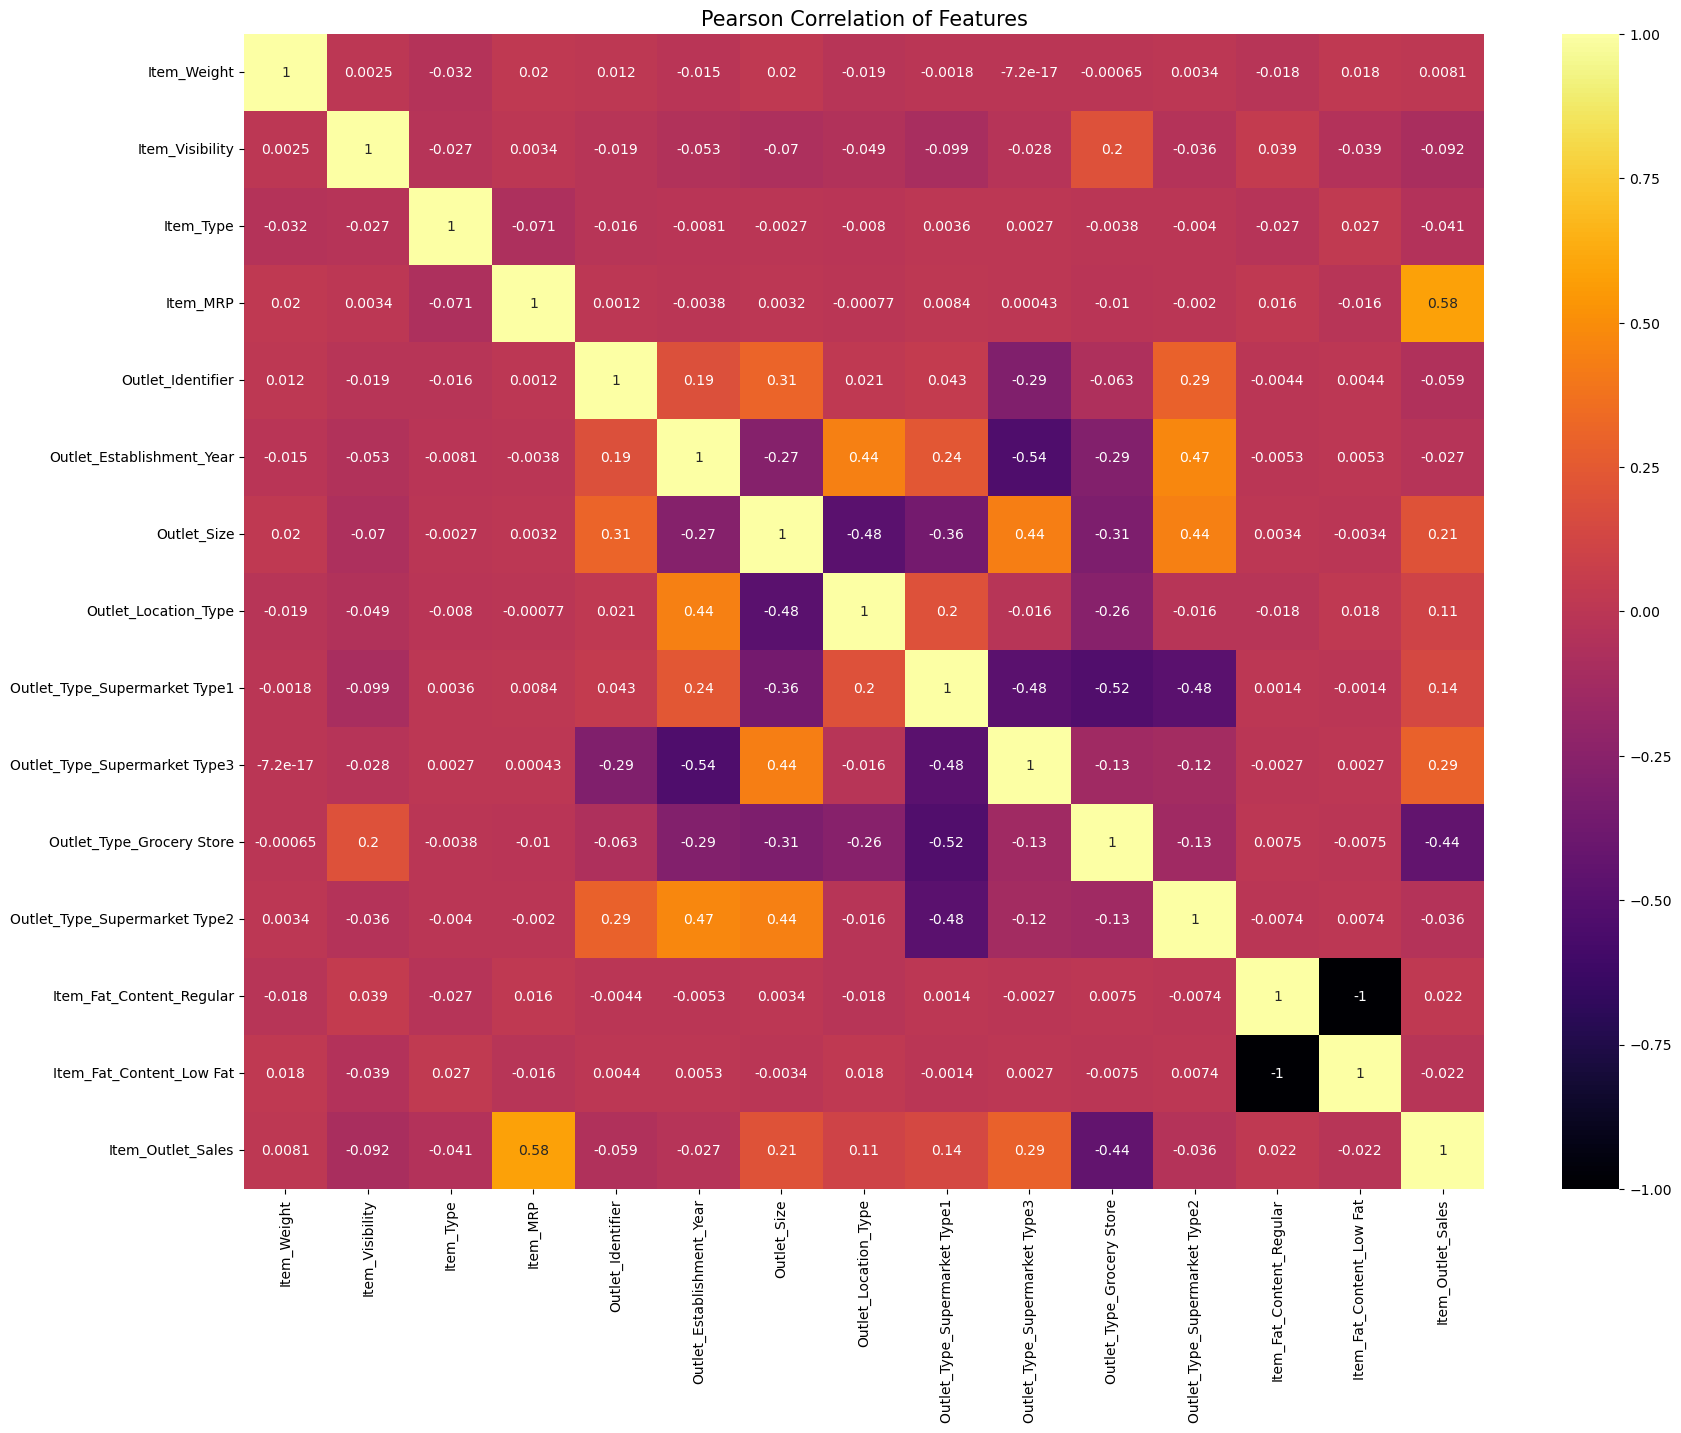

In [85]:
plt.figure(figsize = (20,15))

plt.title('Pearson Correlation of Features', size=15)

sns.heatmap(pd.concat([X_train, pd.DataFrame(y_train, columns = ['Item_Outlet_Sales'])],axis=1).corr(), 
            annot=True, 
            cmap='inferno') # X_train is concatenated with y_train to see the relationship between variables 
plt.show()

### What to do polynomial expansion on
Polynomial expansion is useful for numerical variables, it can help improve and establish a linear relationship. 
#### Variables of consideration 
- Item_MRP 
- Item_Visibility
- Item_Weight

as these are the numerical continuous columns that are meaningful to the target variable and the dataset, and can hence benefit from polynomial expansion. 

Let's inspect these variables further.

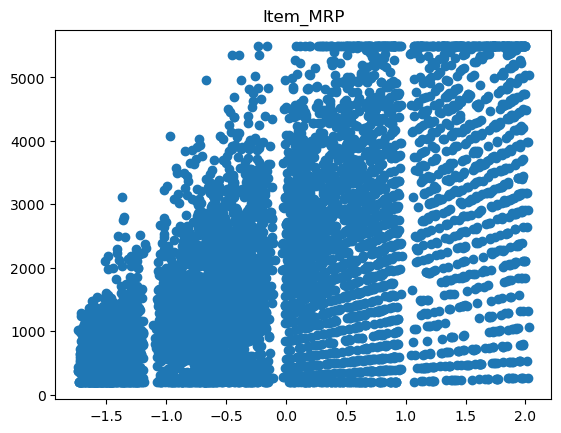

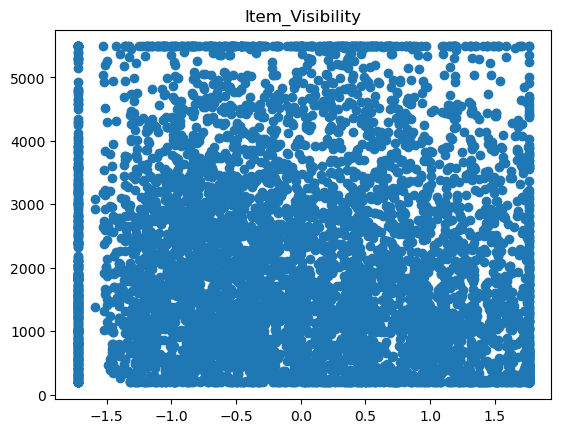

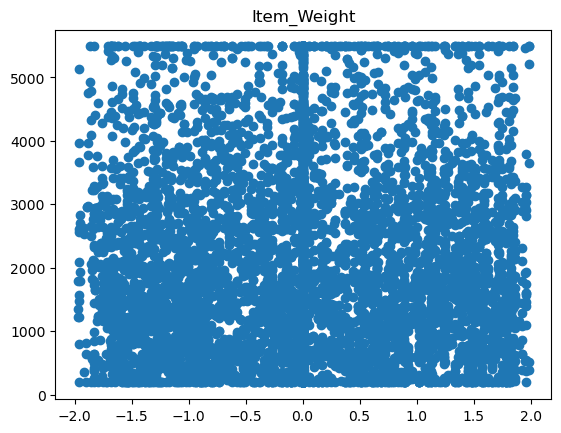

In [86]:
for f in ['Item_MRP','Item_Visibility','Item_Weight']:
    plt.scatter(X_train[f], y_train)
    plt.title(f)
    plt.show()

In [87]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

In [88]:
poly.fit(X_train[['Item_MRP','Item_Visibility','Item_Weight']])

PolynomialFeatures(degree=3, include_bias=False)

In [89]:
train_t = poly.fit_transform(X_train[['Item_MRP','Item_Visibility','Item_Weight']])
test_t = poly.fit_transform(X_test[['Item_MRP','Item_Visibility','Item_Weight']])

In [90]:
poly.get_feature_names_out(['Item_MRP','Item_Visibility','Item_Weight'])

array(['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Item_MRP^2',
       'Item_MRP Item_Visibility', 'Item_MRP Item_Weight',
       'Item_Visibility^2', 'Item_Visibility Item_Weight',
       'Item_Weight^2', 'Item_MRP^3', 'Item_MRP^2 Item_Visibility',
       'Item_MRP^2 Item_Weight', 'Item_MRP Item_Visibility^2',
       'Item_MRP Item_Visibility Item_Weight', 'Item_MRP Item_Weight^2',
       'Item_Visibility^3', 'Item_Visibility^2 Item_Weight',
       'Item_Visibility Item_Weight^2', 'Item_Weight^3'], dtype=object)

In [91]:
# number of columns added 
len(poly.get_feature_names_out(['Item_MRP','Item_Visibility','Item_Weight']))

19

In [92]:
X_train = np.concatenate((X_train, train_t), axis=1)
X_test = np.concatenate((X_test, test_t), axis=1)

### PCA 
PCA (also known as Principle Component Analysis) is feature scaling method used to simplify high dimensional and complex data by reducing its dimensionality. 

I will be using PCA to reduce the dimensions of the test and train sets to in order to further improve the accuracy of my model. 

In [93]:
pca = PCA()

In [94]:

# checking X_train after scaling
#print(X_train_scaled)

In [95]:
pca.fit(X_train)

PCA()

In [96]:
print(len(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

33
[5.39077652e-01 7.34515534e-02 6.94376276e-02 6.78882235e-02
 6.60156670e-02 5.88061629e-02 1.04921494e-02 9.97616821e-03
 9.35814692e-03 8.97972093e-03 8.74482651e-03 8.49387071e-03
 7.95970948e-03 7.55682986e-03 7.41135467e-03 6.98450161e-03
 6.87663852e-03 6.48314490e-03 6.27724828e-03 6.21897399e-03
 3.47183713e-03 2.99365890e-03 1.82873225e-03 1.67381180e-03
 1.63455813e-03 1.47662948e-03 2.76212769e-04 1.54389186e-04
 4.52643485e-33 4.52643485e-33 4.52643485e-33 4.52643485e-33
 3.70732126e-34]


In [97]:
# not yet implemented into X_train 
train_t = pca.transform(X_train)
test_t = pca.transform(X_test)

In [98]:
# comparison
X_train_scaled.to_numpy()

array([[-1.56043241,  1.25081299,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.6369834 , -0.3208148 ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.3583925 ,  2.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.13428866, -1.72414566,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.35910445,  0.96966483,  7.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.25205941, -0.38683568,  4.        , ...,  0.        ,
         0.        ,  1.        ]])

In [99]:
train_t

array([[ 1.20777149e+00, -3.52812996e+00,  3.18525584e+00, ...,
        -2.14983038e-16,  2.44419088e-15,  9.68414079e-16],
       [-9.00860737e+00, -2.03816219e+00,  4.71026021e+00, ...,
        -1.29863858e-15,  1.53282609e-15, -2.01265088e-15],
       [ 1.30997309e+01,  4.36857912e-01,  6.41851937e-01, ...,
        -9.10130772e-16,  2.37501224e-15,  2.74963106e-15],
       ...,
       [-6.21329561e+00, -5.97429707e-01,  3.01811104e-01, ...,
         9.64797462e-16, -3.11475392e-15, -6.48205999e-16],
       [-4.45447826e+00,  4.39270541e-01, -4.16056664e+00, ...,
        -3.92994319e-16, -2.21182746e-16,  1.90843187e-16],
       [-1.35332756e+00,  1.30313882e+00, -1.32190641e+00, ...,
        -4.64800457e-16, -1.51962336e-16, -2.01728103e-15]])

Text(0, 0.5, 'Percentage of Variance Explained')

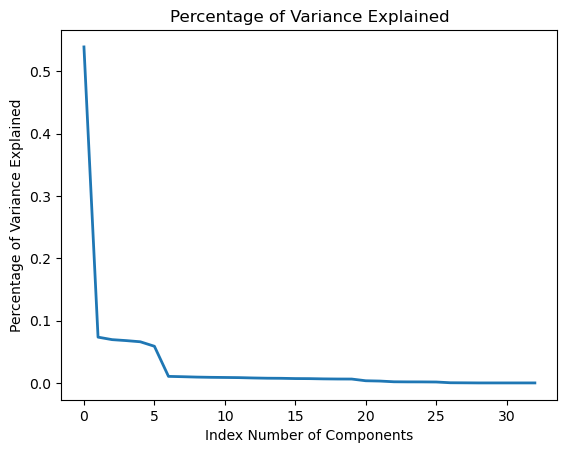

In [100]:
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.title('Percentage of Variance Explained')
plt.xlabel('Index Number of Components')
plt.ylabel('Percentage of Variance Explained')

In [101]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

###  6. Linear Regression Modelling <a id="part6"></a>
Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).

### 6.1 Building and Evaluating the Model <a id="part6.1"></a>
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [102]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model
X_train_student_final_premodel_version = X_train
X_test_student_final_premodel_version = X_test

y_train_student_final_premodel_version = y_train
y_test_student_final_premodel_version = y_test

In [103]:
X_train_final = X_train_student_final_premodel_version
X_test_final = X_test_student_final_premodel_version

y_train_final = y_train_student_final_premodel_version
y_test_final = y_test_student_final_premodel_version

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [105]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\ntest_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\ntest_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 941673.9278821006 
test_mse: 1070731.5721721763
train_r-sq: 0.5923520445055805 
test_r-sq: 0.577433492310917


In [106]:
# Evaluate the Linear Regression Model using Mean Absolute Error (MAE)
# The lower MAE, the better model performance

from sklearn.metrics import mean_absolute_error

print('train_mae:', mean_absolute_error(y_train, model_linear_regression.predict(X_train_final)), 
      '\ntest_mae:', mean_absolute_error(y_test, model_linear_regression.predict(X_test_final)))

train_mae: 755.2337320747586 
test_mae: 806.4446095341516


### 7. Reflection  <a id="part7"></a>

### 7.1 Summary <a id="part7.1"></a>

The main goal of this assignment was to transform and clean raw data to make it suitable for analysis and capable of being interpreted or processed by a machine,in order to build a Linear Regression Model to help predict the Item_Outlet_Sales for the supermarket management team.


### Findings in the dataset 

##### Numerical Variables : 
- most of the numerical variables found were relatively clean and exhibited normal distributions
- Item_Weight contained nulls, which was handled using mean imputation 
- Item_Outlet_Sales (the target variable) and Item_Visibility were found to have outliers, which were handled using winsoration
- Several numerical transformation techniques caused the continuous variables to have skewed distributions and outliers, which was not favourable
- Yeo-Johnson technique used on Item_Visibility improved the distribution

###### Categorical Variables : 
- Item_Identifier had the highest cardinality with 1559 unique values; hence it was dropped
- The variables had similar cardinalities, only Item_Type and Outlet_Location_Identifier had the higher cardinalities 
- Different encoding methods were used for different variables appropriately

###### Scaling : 
- Used standardisation on the continuous variables, however it did not affect the score significantly. 

###### Pearson Correlation of Features :
- gave a clear view of how correlation of variables with the target
- out of the continuous variables, only Item_MRP (the maximum retail price of an item) showed a positive linear relationship with the target. This was also seen previously in the exploration of data. 
- performed polynomial expansion on the continuous variables ; doing so helps to make a second degree polynomial of the variable which shows an improved linear relationship with the target 

### 7.2 Improvements <a id="part7.2"></a>

##### Final scores : 
##### mean squared error : 
- train_mse: 941673.9278821006 
- test_mse: 1070731.5721721763
##### r-square
- train_r-sq: 0.5923520445055805 
- test_r-sq: 0.577433492310917
##### mean absolute error
- train_mae: 755.2337320747586 
- test_mae: 806.4446095341516

##### Reflection 
- the scores could be improved, however this was done to the best of my capability and my logical reasonings for data wrangling techniques 
- more validation can be done for the techniques used, for example with better visualisations and comparisons.

##### Overall
This assignment will serve as a learning curve, I will gain more experience over time and this assignment has gave me a base understanding of data wrangling, but there is still much to learn and improve.

### 7.3 Presentation <a id="part7.3"></a>
here's the video link for my presentation : https://youtu.be/5IzL_xY--bc